In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
customer_data = pd.read_csv("C:\\upGrad_DataScience\\Credit_EDA_CaseStudy\\application_data.csv")
customer_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
customer_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [5]:
customer_data.shape

(307511, 122)

In [6]:
customer_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [7]:
customer_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
## Find out which all columns are having NULL values
customer_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
## Get number of rows. This can be retrieved by using .index or .shape
len(customer_data.index)

307511

In [10]:
## Get NULL percentage for all columns
round((customer_data.isnull().sum()*100)/len(customer_data.index),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [11]:
## drop all columns having > 40% null value

customer_data.drop(["OWN_CAR_AGE", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "APARTMENTS_AVG",
                        "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BUILD_AVG", "COMMONAREA_AVG",
                        "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG",
                        "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG",
                        "APARTMENTS_MODE","BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BUILD_MODE", 
                        "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE", "FLOORSMAX_MODE", "FLOORSMIN_MODE", 
                        "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE", "NONLIVINGAPARTMENTS_MODE", 
                        "NONLIVINGAREA_MODE", "APARTMENTS_MEDI","BASEMENTAREA_MEDI", "YEARS_BEGINEXPLUATATION_MEDI", 
                        "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI", "FLOORSMAX_MEDI", 
                        "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", 
                        "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", 
                        "TOTALAREA_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE"], axis=1, inplace=True)

In [12]:
## Columns "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH" and "DAYS_LAST_PHONE_CHANGE" are 
## having negative values, which doesn't look correct. So, convert these values to positive values.

customer_data["DAYS_BIRTH"] = abs(customer_data["DAYS_BIRTH"])
customer_data["DAYS_EMPLOYED"] = abs(customer_data["DAYS_EMPLOYED"])
customer_data["DAYS_REGISTRATION"] = abs(customer_data["DAYS_REGISTRATION"])
customer_data["DAYS_ID_PUBLISH"] = abs(customer_data["DAYS_ID_PUBLISH"])
customer_data["DAYS_LAST_PHONE_CHANGE"] = abs(customer_data["DAYS_LAST_PHONE_CHANGE"])

In [13]:
customer_data["DAYS_LAST_PHONE_CHANGE"].isnull().sum()

1

In [14]:
customer_data["DAYS_LAST_PHONE_CHANGE"].describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [15]:
## Replace NULL value in "DAYS_LAST_PHONE_CHANGE" with median value
customer_data["DAYS_LAST_PHONE_CHANGE"] = customer_data["DAYS_LAST_PHONE_CHANGE"].replace(np.nan, 757)

In [16]:
## convert all DAYS columns to YEARS for easy bucketing for further analysis
customer_data["YEARS_BIRTH"] = customer_data["DAYS_BIRTH"].apply(lambda x: round(x/365))
customer_data["YEARS_EMPLOYED"] = customer_data["DAYS_EMPLOYED"].apply(lambda x: round(x/365))
customer_data["YEARS_REGISTRATION"] = customer_data["DAYS_REGISTRATION"].apply(lambda x: round(x/365))
customer_data["YEARS_ID_PUBLISH"] = customer_data["DAYS_ID_PUBLISH"].apply(lambda x: round(x/365))
customer_data["YEARS_LAST_PHONE_CHANGE"] = customer_data["DAYS_LAST_PHONE_CHANGE"].apply(lambda x: round(x/365))

In [17]:
customer_data[["YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_REGISTRATION", "YEARS_ID_PUBLISH", "YEARS_LAST_PHONE_CHANGE"]].describe()

,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.938646,185.608021,13.659440,8.198575,2.632868
std,11.964047,382.165887,9.659369,4.151520,2.281341
min,21.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.000000,6.000000,5.000000,1.000000
50%,43.000000,6.000000,12.000000,9.000000,2.000000
75%,54.000000,16.000000,20.000000,12.000000,4.000000
max,69.000000,1001.000000,68.000000,20.000000,12.000000


In [18]:
## Replace Unrealistic value in "YEARS_EMPLOYED" with median value
customer_data["YEARS_EMPLOYED"] = customer_data["YEARS_EMPLOYED"].replace(1001, 6)

In [19]:
## drop all DAYS columns as YEARS columns are available now
customer_data.drop("DAYS_BIRTH", axis=1, inplace=True)
customer_data.drop("DAYS_EMPLOYED", axis=1, inplace=True)
customer_data.drop("DAYS_REGISTRATION", axis=1, inplace=True)
customer_data.drop("DAYS_ID_PUBLISH", axis=1, inplace=True)
customer_data.drop("DAYS_LAST_PHONE_CHANGE", axis=1, inplace=True)

In [20]:
customer_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,10,6,3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,3,1,2
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,12,7,2
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,8,27,7,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,12,9,3
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46,4,14,1,7
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,1.0,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,38,9,3,2,4
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,13,7,3
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.01863

In [21]:
## Again, check what all columns are left
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [22]:
## Now, calculate NULL percenatge in all columns
round((customer_data.isnull().sum()*100)/len(customer_data.index),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
W

In [23]:
## Find out possible values for "OCCUPATION_TYPE"
customer_data["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [24]:
## Find out how many NULL are present in "OCCUPATION_TYPE"
customer_data["OCCUPATION_TYPE"].isnull().sum()

96391

In [ ]:
## drop OCCUPATION_TYPE column as it is not possible to populate NULL values with any of the above value
## customer_data.drop("OCCUPATION_TYPE", axis = 1, inplace=True)

In [25]:
## Find out possible values for "CREDIT BUREAU REQUEST PER HOUR"
customer_data["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [26]:
customer_data["AMT_REQ_CREDIT_BUREAU_HOUR"].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [27]:
customer_data["AMT_REQ_CREDIT_BUREAU_HOUR"].isnull().sum()

41519

In [28]:
customer_data["AMT_REQ_CREDIT_BUREAU_HOUR"] = customer_data["AMT_REQ_CREDIT_BUREAU_HOUR"].replace(np.nan, 0)

In [29]:
## Find out possible values for "CREDIT BUREAU REQUEST PER DAY"
customer_data["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [30]:
customer_data["AMT_REQ_CREDIT_BUREAU_DAY"].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [31]:
customer_data["AMT_REQ_CREDIT_BUREAU_DAY"].isnull().sum()

41519

In [32]:
customer_data["AMT_REQ_CREDIT_BUREAU_DAY"] = customer_data["AMT_REQ_CREDIT_BUREAU_DAY"].replace(np.nan, 0)

In [33]:
## Find out possible values for "CREDIT BUREAU REQUEST PER WEEK"
customer_data["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [34]:
customer_data["AMT_REQ_CREDIT_BUREAU_WEEK"].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [35]:
customer_data["AMT_REQ_CREDIT_BUREAU_WEEK"].isnull().sum()

41519

In [36]:
customer_data["AMT_REQ_CREDIT_BUREAU_WEEK"] = customer_data["AMT_REQ_CREDIT_BUREAU_WEEK"].replace(np.nan, 0)

In [37]:
## Find out possible values for "CREDIT BUREAU REQUEST PER MON"
customer_data["AMT_REQ_CREDIT_BUREAU_MON"].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [38]:
customer_data["AMT_REQ_CREDIT_BUREAU_MON"].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [39]:
customer_data["AMT_REQ_CREDIT_BUREAU_MON"].isnull().sum()

41519

In [40]:
customer_data["AMT_REQ_CREDIT_BUREAU_MON"] = customer_data["AMT_REQ_CREDIT_BUREAU_MON"].replace(np.nan, 0)

In [41]:
## Find out possible values for "CREDIT BUREAU REQUEST PER QUARTER"
customer_data["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [42]:
customer_data["AMT_REQ_CREDIT_BUREAU_QRT"].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [43]:
customer_data["AMT_REQ_CREDIT_BUREAU_QRT"].isnull().sum()

41519

In [44]:
customer_data["AMT_REQ_CREDIT_BUREAU_QRT"] = customer_data["AMT_REQ_CREDIT_BUREAU_QRT"].replace(np.nan, 0)

In [45]:
## Find out possible values for "CREDIT BUREAU REQUEST PER YEAR"
customer_data["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [46]:
customer_data["AMT_REQ_CREDIT_BUREAU_YEAR"].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [47]:
customer_data["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().sum()

41519

In [48]:
customer_data["AMT_REQ_CREDIT_BUREAU_YEAR"] = customer_data["AMT_REQ_CREDIT_BUREAU_YEAR"].replace(np.nan, 0)

In [49]:
customer_data["NAME_TYPE_SUITE"].isnull().sum()

1292

In [50]:
## Find out possible values for "ACCOMPANYING PERSON"
customer_data["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [51]:
customer_data["NAME_TYPE_SUITE"] = customer_data["NAME_TYPE_SUITE"].replace(np.nan, "Unaccompanied")

In [52]:
## Find out possible values for "OBSERVATIONS for 30 Days Past Due"
customer_data["OBS_30_CNT_SOCIAL_CIRCLE"].value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
28.0          1
348.0         1
29.0          1
47.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [53]:
customer_data["OBS_30_CNT_SOCIAL_CIRCLE"].isnull().sum()

1021

In [54]:
customer_data["OBS_30_CNT_SOCIAL_CIRCLE"].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [55]:
customer_data["OBS_30_CNT_SOCIAL_CIRCLE"] = customer_data["OBS_30_CNT_SOCIAL_CIRCLE"].replace(np.nan, 0)

In [56]:
## Find out possible values for "DEFAULTS for 30 Days Past Due"
customer_data["DEF_30_CNT_SOCIAL_CIRCLE"].value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
8.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [57]:
customer_data["DEF_30_CNT_SOCIAL_CIRCLE"].isnull().sum()

1021

In [58]:
customer_data["DEF_30_CNT_SOCIAL_CIRCLE"].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [59]:
customer_data["DEF_30_CNT_SOCIAL_CIRCLE"] = customer_data["DEF_30_CNT_SOCIAL_CIRCLE"].replace(np.nan, 0)

In [60]:
## Find out possible values for "OBSERVATIONS for 60 Days Past Due"
customer_data["OBS_60_CNT_SOCIAL_CIRCLE"].value_counts()

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
344.0         1
47.0          1
26.0          1
30.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [61]:
customer_data["OBS_60_CNT_SOCIAL_CIRCLE"].isnull().sum()

1021

In [62]:
customer_data["OBS_60_CNT_SOCIAL_CIRCLE"].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [63]:
customer_data["OBS_60_CNT_SOCIAL_CIRCLE"] = customer_data["OBS_60_CNT_SOCIAL_CIRCLE"].replace(np.nan, 0)

In [64]:
## Find out possible values for "DEFAULTS for 60 Days Past Due"
customer_data["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts()

0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
24.0         1
7.0          1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [65]:
customer_data["DEF_60_CNT_SOCIAL_CIRCLE"].isnull().sum()

1021

In [66]:
customer_data["DEF_60_CNT_SOCIAL_CIRCLE"].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [67]:
customer_data["DEF_60_CNT_SOCIAL_CIRCLE"] = customer_data["DEF_60_CNT_SOCIAL_CIRCLE"].replace(np.nan, 0)

In [68]:
## Find out possible values for "GOODS PRICE"
customer_data["AMT_GOODS_PRICE"].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
1575000.0     1875
688500.0      1824
292500.0      1708
148500.0      1674
477000.0      1611
810000.0      1568
67500.0       1505
697500.0      1408
382500.0      1396
765000.0      1396
904500.0      1375
283500.0      1372
252000.0      1368
234000.0      1279
45000.0       1169
945000.0      1161
855000.0      1113
1129500.0     1109
913500.0      1065
328500.0      1059
459000.0      1023
193500.0      1007
103500.0    

In [69]:
customer_data["AMT_GOODS_PRICE"].isnull().sum()

278

In [70]:
customer_data["AMT_GOODS_PRICE"].describe([0.90,0.95])

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
50%      4.500000e+05
90%      1.093500e+06
95%      1.305000e+06
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [71]:
customer_data["AMT_GOODS_PRICE"] = customer_data["AMT_GOODS_PRICE"].replace(np.nan, 4.500000e+05)

In [72]:
## Now, calculate NULL percenatge in all columns
round((customer_data.isnull().sum()*100)/len(customer_data.index),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.00
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
W

In [73]:
customer_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,10,6,3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,3,1,2
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,12,7,2
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,8,27,7,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,12,9,3
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46,4,14,1,7
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,1.0,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,38,9,3,2,4
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,13,7,3
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.01863

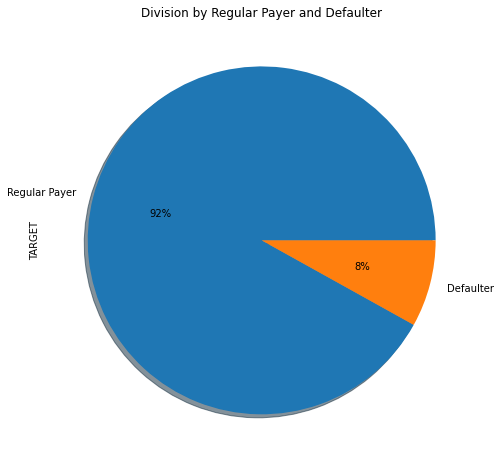

In [74]:
## plot a pie chart showing division of regular payer and defaulter
plt.figure(figsize = [8,8])
customer_data["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%", labels = ['Regular Payer', 'Defaulter'], shadow = True)
plt.title("Division by Regular Payer and Defaulter")
plt.show()

In [ ]:
# Observations-

# 1. There are about 8% customers who are defaulters and remaining 92% are regular payers.

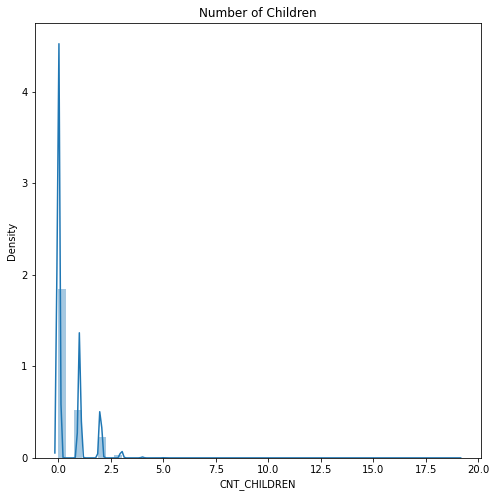

In [75]:
plt.figure(figsize=[8,8])
sns.distplot(customer_data["CNT_CHILDREN"])
plt.title("Number of Children")
# plt.boxplot(customer_data["CNT_CHILDREN"])
plt.show()

In [ ]:
# Observations-

# 1. Number of Children varies from 0 to 19.
# 2. Majority of customers are having no children.

In [168]:
customer_data[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,3.075110e+05,3.075110e+05,307499.000000,3.075110e+05
mean,1.687979e+05,5.990260e+05,27108.573909,5.383163e+05
std,2.371231e+05,4.024908e+05,14493.737315,3.692890e+05
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06


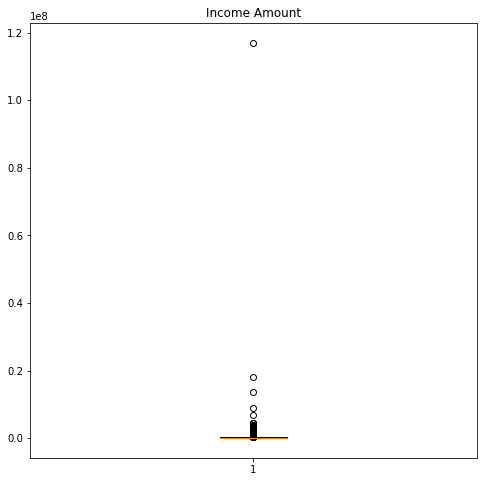

In [76]:
plt.figure(figsize=[8,8])
plt.boxplot(customer_data["AMT_INCOME_TOTAL"])
plt.title("Income Amount")
plt.show()

In [ ]:
# Observations-

# 1. Majority of customers are having income less than 200 K.
# 2. There are some outliers having very high income, need to verify their loan demand.

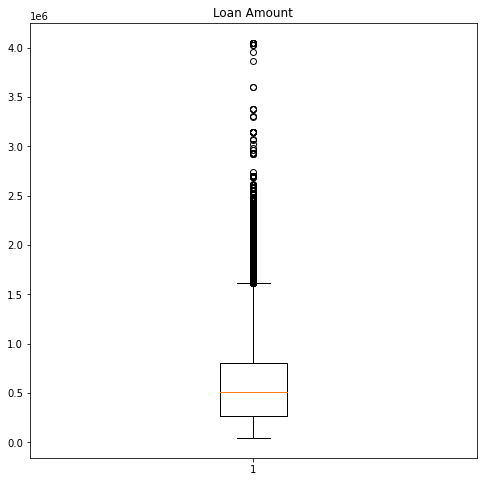

In [77]:
plt.figure(figsize=[8,8])
plt.boxplot(customer_data["AMT_CREDIT"])
plt.title("Loan Amount")
plt.show()

In [ ]:
# Observations-

# 1. Majority of customers are having loan amount less than 1.5 Million.
# 2. There are some outliers having very high loan amount, need to validate their risk exposure.

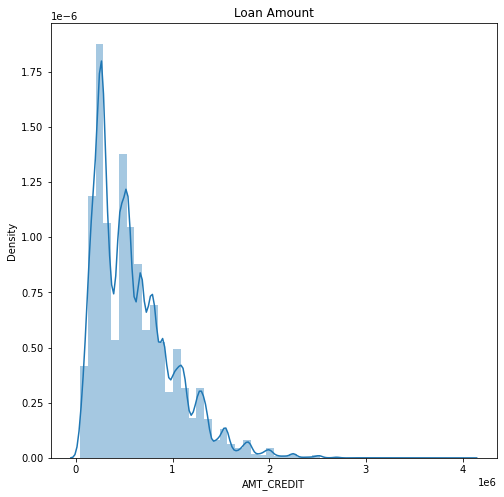

In [78]:
plt.figure(figsize=[8,8])
sns.distplot(customer_data["AMT_CREDIT"])
plt.title("Loan Amount")
plt.show()

In [ ]:
# Observations-

# 1. Majority of customers are having loan amount less than 1.5 Million.

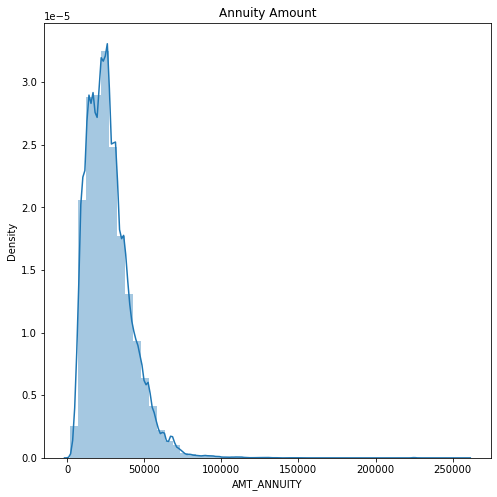

In [79]:
plt.figure(figsize=[8,8])
sns.distplot(customer_data["AMT_ANNUITY"])
plt.title("Annuity Amount")
plt.show()

In [ ]:
# Observations-

# 1. Majority of customers are having annuity amount less than 50000.

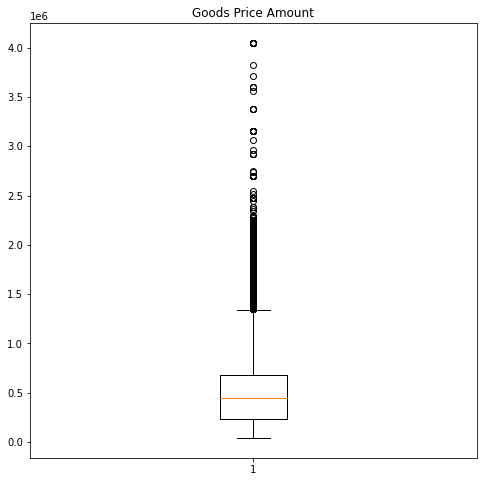

In [80]:
plt.figure(figsize=[8,8])
plt.boxplot(customer_data["AMT_GOODS_PRICE"])
plt.title("Goods Price Amount")
plt.show()

In [ ]:
# Observations-

# 1. Majority of goods for which loan is taken, are having value less than 70000.

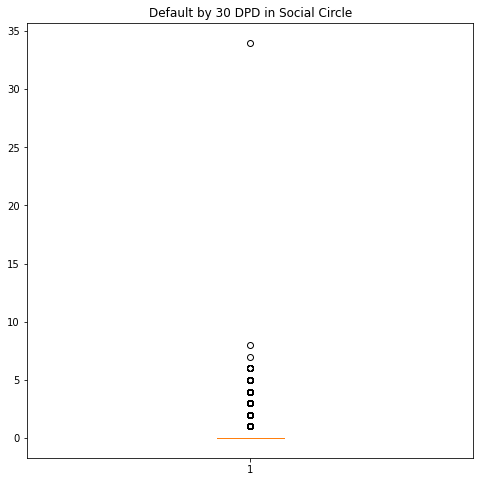

In [81]:
plt.figure(figsize=[8,8])
plt.boxplot(customer_data["DEF_30_CNT_SOCIAL_CIRCLE"])
plt.title("Default by 30 DPD in Social Circle")
plt.show()

In [ ]:
# Observations-

# 1. Majority of customers are not having any DPD occurances in surrounding areas.

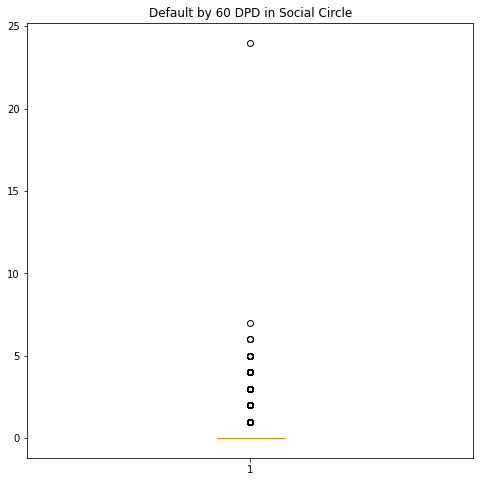

In [82]:
plt.figure(figsize=[8,8])
plt.boxplot(customer_data["DEF_60_CNT_SOCIAL_CIRCLE"])
plt.title("Default by 60 DPD in Social Circle")
plt.show()

In [ ]:
# Observations-

# 1. Majority of customers are not having any DPD occurances in surrounding areas.

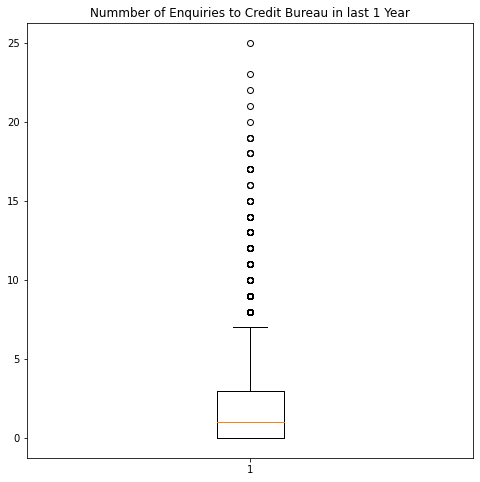

In [83]:
plt.figure(figsize=[8,8])
plt.boxplot(customer_data["AMT_REQ_CREDIT_BUREAU_YEAR"])
plt.title("Number of Enquiries to Credit Bureau in last 1 Year")
plt.show()

In [ ]:
# Observations-

# 1. Majority of enquiries to credit bureau in last 1 year are between 0 to 3 with outliers as high as 25.

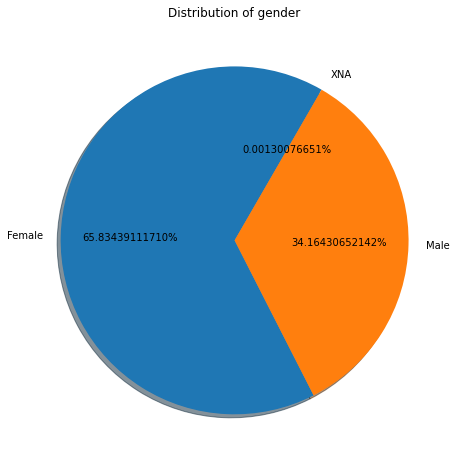

In [84]:
plt.figure(figsize=[8,8])
plt.pie(customer_data["CODE_GENDER"].value_counts(), autopct='%1.11f%%', 
        startangle = 60, shadow = True, labels = ['Female', 'Male', 'XNA'])
plt.title("Distribution of gender")
plt.show()

In [ ]:
# Observations-

# 1. Majority of customers are females, which are almost double than male customers.

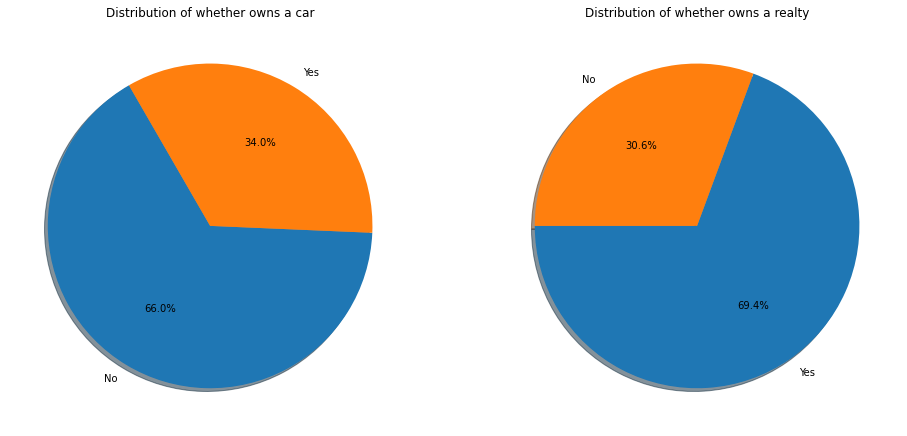

In [85]:
plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
plt.pie(customer_data["FLAG_OWN_CAR"].value_counts(), autopct='%1.1f%%', 
        startangle = 120, shadow = True, labels = ['No', 'Yes'])
plt.title("Distribution of whether owns a car")

plt.subplot(1,2,2)
plt.pie(customer_data["FLAG_OWN_REALTY"].value_counts(), autopct='%1.1f%%', 
        startangle = 180, shadow = True, labels = ['Yes', 'No'])
plt.title("Distribution of whether owns a realty")

plt.show()

In [ ]:
# Observations-

# 1. Majority of customers are not having car.
# 2. Majority of customers are having realty.

In [86]:
customer_data["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

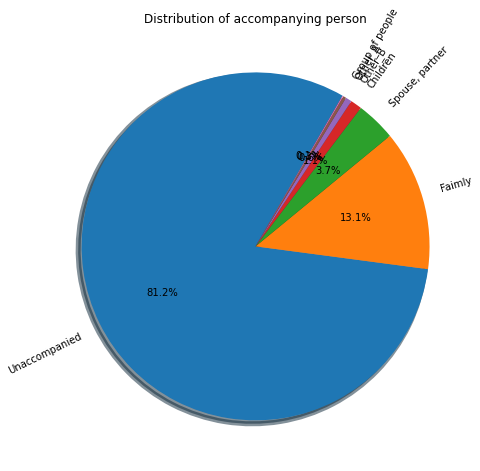

In [87]:
plt.figure(figsize=[10,8])
plt.pie(customer_data["NAME_TYPE_SUITE"].value_counts(), autopct='%1.1f%%', 
        startangle = 60, shadow = True, wedgeprops = {'linewidth': 5}, rotatelabels = True,
        labels = ['Unaccompanied', 'Faimly', 'Spouse, partner', 'Children', 'Other_B', 'Other_A', 'Group of people'])    
plt.title("Distribution of accompanying person")
plt.show()

In [ ]:
# Observations-

# 1. Majority of customers are going to bank on their own without accompanying anyone.
# 2. The preference of customers are either to go with family or spouse/partner.

In [88]:
customer_data["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

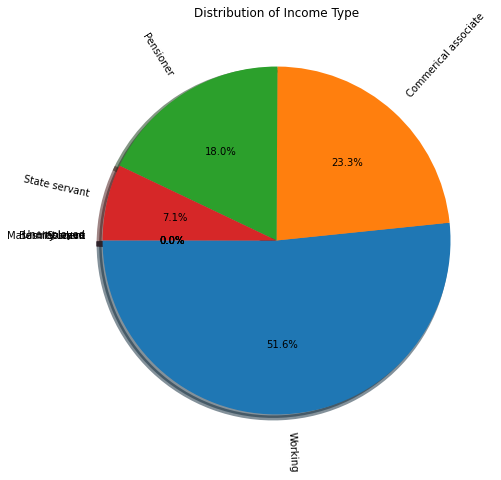

In [89]:
plt.figure(figsize=[8,8])
plt.pie(customer_data["NAME_INCOME_TYPE"].value_counts(), autopct='%1.1f%%', 
        startangle = 180, shadow = True, wedgeprops = {'linewidth': 5}, rotatelabels = True, 
        labels = ['Working', 'Commerical associate', 'Pensioner', 'State servant', 
                  'Unemployed', 'Student', 'Businessman', 'Maternity leave'])
plt.title("Distribution of Income Type")
plt.show()

In [ ]:
# Observations-

# 1. Majority of customers are working or commercial associate.
# 2. Pensioners also form a considerable part of bank customers.

In [90]:
customer_data["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

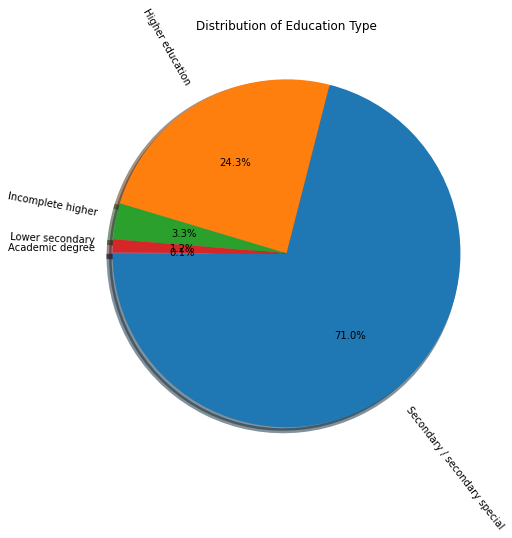

In [91]:
plt.figure(figsize=[8,8])
plt.pie(customer_data["NAME_EDUCATION_TYPE"].value_counts(), autopct='%1.1f%%', 
        startangle = 180, shadow = True, wedgeprops = {'linewidth': 5}, rotatelabels = True, 
        labels = ['Secondary / secondary special', 'Higher education', 'Incomplete higher', 
                  'Lower secondary', 'Academic degree'])
plt.title("Distribution of Education Type")
plt.show()

In [ ]:
# Observations-

# 1. Majority of customers are having secondary education.
# 2. The second segment of customers is having higher education.

In [92]:
customer_data["NAME_FAMILY_STATUS"].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

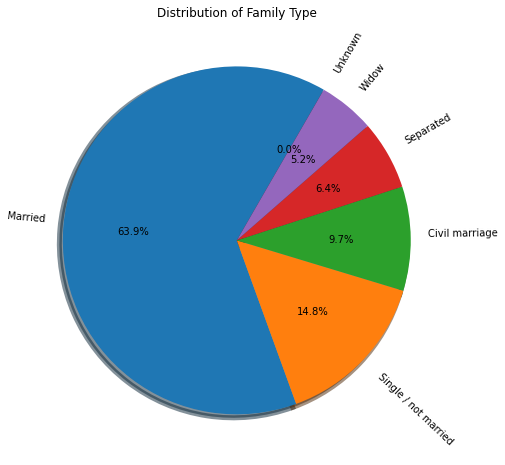

In [93]:
plt.figure(figsize=[8,8])
plt.pie(customer_data["NAME_FAMILY_STATUS"].value_counts(), autopct='%1.1f%%', 
        startangle = 60, shadow = True, wedgeprops = {'linewidth': 5}, rotatelabels = True, 
        labels = ['Married', 'Single / not married', 'Civil marriage', 'Separated',
                  'Widow', 'Unknown'])
plt.title("Distribution of Family Type")
plt.show()

In [ ]:
# Observations-

# 1. Majority of customers married.
# 2. There are considerable amount of customers which are Single as well as civil marriage.

In [94]:
customer_data["NAME_HOUSING_TYPE"].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

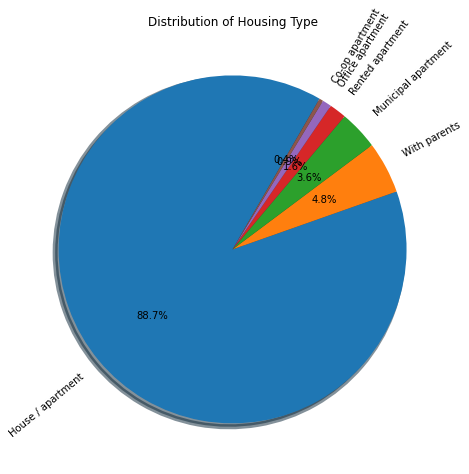

In [95]:
plt.figure(figsize=[8,8])
plt.pie(customer_data["NAME_HOUSING_TYPE"].value_counts(), autopct='%1.1f%%', 
        startangle = 60, shadow = True, wedgeprops = {'linewidth': 5}, rotatelabels = True, 
        labels = ['House / apartment', 'With parents', 'Municipal apartment', 
                  'Rented apartment','Office apartment', 'Co-op apartment'])
plt.title("Distribution of Housing Type")
plt.show()

In [ ]:
# Observations-

# 1. Majority of customers are staying in either house or apartment.
# 2. There are customers who are still staying with parents, which can be assumed as young age customers.

In [96]:
customer_data["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

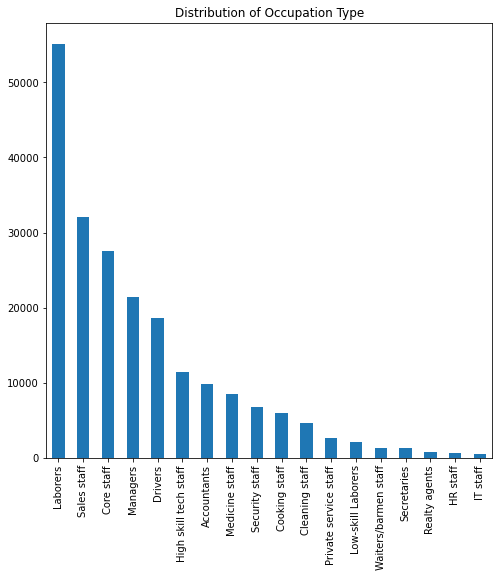

In [97]:
plt.figure(figsize = [8,8])
customer_data["OCCUPATION_TYPE"].value_counts().plot.bar()
plt.title("Distribution of Occupation Type")
plt.show()

In [ ]:
# Observations-

# 1. Majority of customers are either Laborers, Sales Staff or Core Staff.
# 2. The percentage of realty agents, HR staff and IT staff as bank customers are very less.

In [98]:
## get data for all defaulters to identify patterns
defaulters = customer_data[customer_data["TARGET"] == 1]
defaulters.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,10,6,3
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,10.0,1.0,10.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,51,7,18,5,0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,48,3,3,3,3
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,37,10,0,12,4
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,1.0,1.0,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,68,6,15,12,0
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,1,1,0,1,0,0,NaN,1.0,2,2,SUNDAY,13,0,0,0,0,1,1,Industry: type 4,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,28,6,13,3,2
110,100130,1,Cash loans,F,N,Y,1,157500.0,723996.0,30802.5,585000.0,Unaccompanied,Commercial associate,Incomplete higher,Separated,House / apartment,0.007274,1,1,0,1,1,0,Sales staff,2.0,2,2,SUNDAY,12,0,1,1,0,1,1,Trade: type 2,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,29,1,1,9,0
138,100160,1,Cash loans,M,N,Y,0,292500.0,675000.0,36747.0,675000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,1,1,1,1,1,0,Managers,2.0,2,2,FRIDAY,18,1,1,0,1,1,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,1,14,0,0
154,100181,1,Cash loans,F,N,Y,0,157500.0,245619.0,12667.5,166500.0,Unaccompanied,Working,Secondary / secondary special,Single / no

In [99]:
defaulters.shape

(24825, 71)

In [100]:
## defaulters gender wise
defaulters["CODE_GENDER"].value_counts()

F    14170
M    10655
Name: CODE_GENDER, dtype: int64

In [101]:
## defaulters loan type wise
defaulters["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64

In [102]:
## defaulters age wise
defaulters["YEARS_BIRTH"].value_counts()

28    975
30    885
32    854
31    850
29    839
37    801
36    790
38    769
34    769
33    756
35    752
39    746
27    746
40    722
41    667
42    653
44    633
43    630
46    582
45    558
47    543
49    522
23    517
53    497
54    480
48    473
51    466
50    464
52    443
25    438
24    436
26    427
55    406
56    396
57    370
59    363
58    344
60    337
61    313
63    313
62    276
22    257
64    250
65    222
66     94
21     73
67     67
68     48
69     13
Name: YEARS_BIRTH, dtype: int64

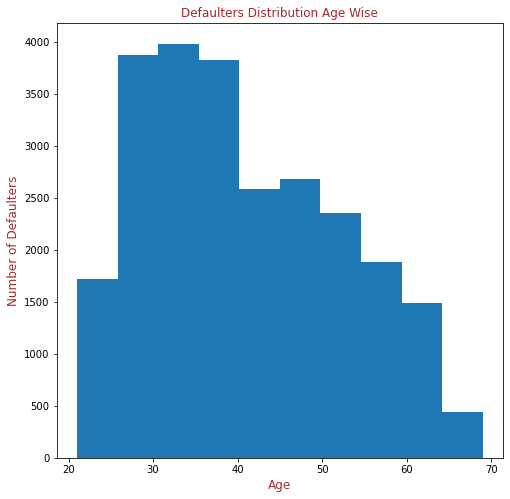

In [103]:
plt.figure(figsize = [8,8])
plt.hist(defaulters["YEARS_BIRTH"], bins = 10)

plt.title("Defaulters Distribution Age Wise", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.xlabel("Age", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Number of Defaulters", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

In [ ]:
# Observations-

# 1. Majority of customers who are defaulting, are from age group of 28 to 40.
# 2. People above age group of 65 are regular payers.

<Figure size 864x864 with 0 Axes>

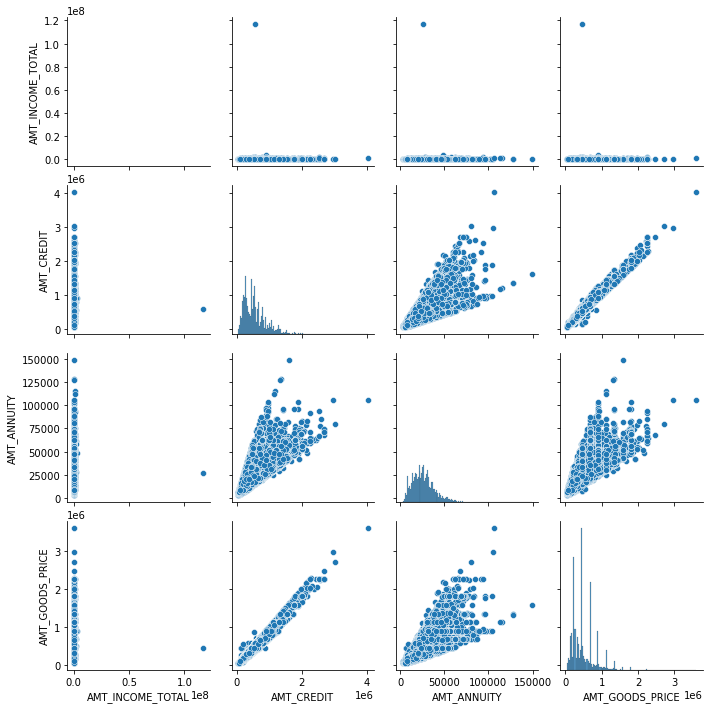

In [104]:
plt.figure(figsize = [12, 12])
amount = defaulters[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]]
sns.pairplot(amount, palette=["b","r"])
plt.show()

In [ ]:
# Observations-

# 1. There is strong co-relation between "AMT_CREDIT" and 'AMT_ANNUITY".
# 2. There is also strong co-relation between "AMT_GOODS_PRICE", "AMT_CREDIT" and 'AMT_ANNUITY".
# 3. It looks like there is no so-relation between "AMT_INCOME" and "AMT_CREDIT", which needs to be 
#   thoroughly as loan amount being sanctioned should be in proportion of customer income.

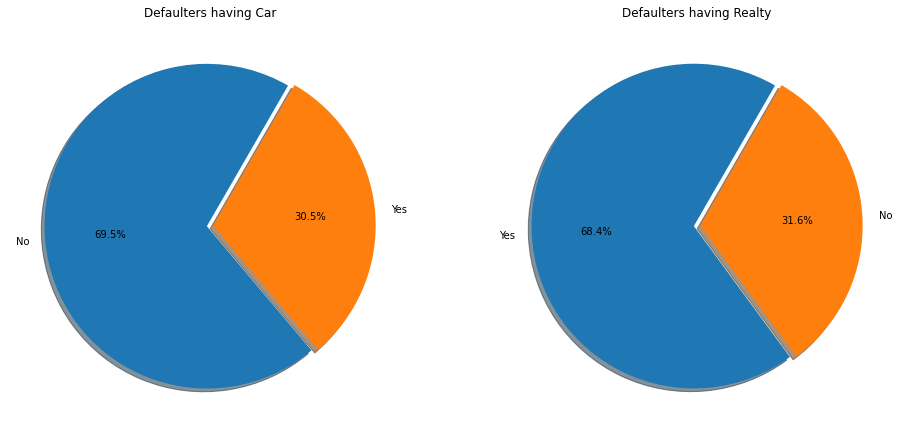

In [105]:
plt.figure(figsize = [16,8])

plt.subplot(121)
plt.pie(defaulters["FLAG_OWN_CAR"].value_counts(), autopct='%1.1f%%', 
        startangle = 60, shadow = True, labels = ["No", "Yes"], explode=[.02,.02])
plt.title("Defaulters having Car")

plt.subplot(122)
plt.pie(defaulters["FLAG_OWN_REALTY"].value_counts(), autopct='%1.1f%%', 
        startangle = 60, shadow = True, labels = ["Yes", "No"], explode=[.02,.02])
plt.title("Defaulters having Realty")

plt.show()

In [ ]:
# Observations-

# 1. Majority of defaulters are not having car.
# 2. Majority of defaulters are having realty.

In [106]:
defaulters["FLAG_OWN_REALTY"].value_counts()

Y    16983
N     7842
Name: FLAG_OWN_REALTY, dtype: int64

In [107]:
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   24825 non-null  int64  
 1   TARGET                       24825 non-null  int64  
 2   NAME_CONTRACT_TYPE           24825 non-null  object 
 3   CODE_GENDER                  24825 non-null  object 
 4   FLAG_OWN_CAR                 24825 non-null  object 
 5   FLAG_OWN_REALTY              24825 non-null  object 
 6   CNT_CHILDREN                 24825 non-null  int64  
 7   AMT_INCOME_TOTAL             24825 non-null  float64
 8   AMT_CREDIT                   24825 non-null  float64
 9   AMT_ANNUITY                  24825 non-null  float64
 10  AMT_GOODS_PRICE              24825 non-null  float64
 11  NAME_TYPE_SUITE              24825 non-null  object 
 12  NAME_INCOME_TYPE             24825 non-null  object 
 13  NAME_EDUCATION_

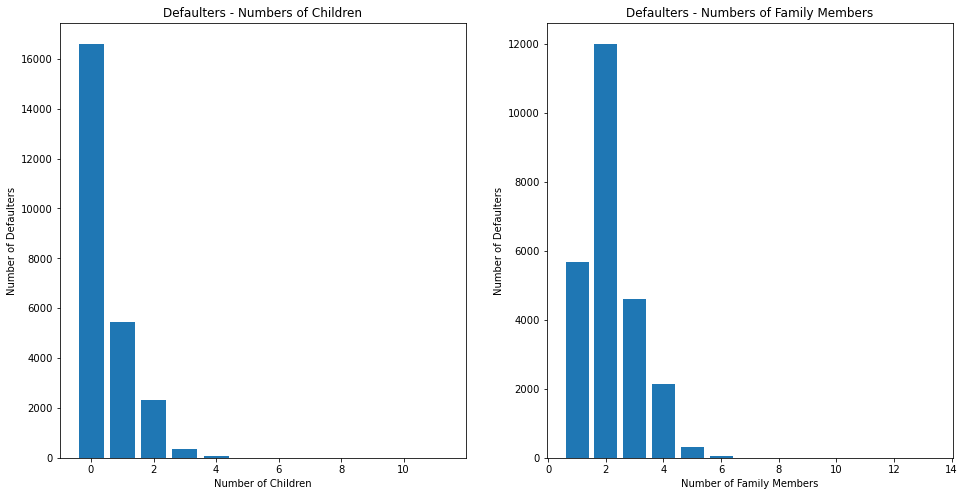

In [108]:
plt.figure(figsize = [16,8])

plt.subplot(121)
plt.bar(defaulters["CNT_CHILDREN"].value_counts().index, defaulters["CNT_CHILDREN"].value_counts())
plt.xlabel("Number of Children")
plt.ylabel("Number of Defaulters")
plt.title("Defaulters - Numbers of Children")

plt.subplot(122)
plt.bar(defaulters["CNT_FAM_MEMBERS"].value_counts().index, defaulters["CNT_FAM_MEMBERS"].value_counts())
plt.xlabel("Number of Family Members")
plt.ylabel("Number of Defaulters")
plt.title("Defaulters - Numbers of Family Members")

plt.show()

In [ ]:
# Observations-

# 1. Majority of defaulters are having 0, 1 or 2 children.
# 2. Majority of defaulters are having 1, 2 or 3 family members .

In [109]:
defaulters["CNT_CHILDREN"].value_counts()

0     16609
1      5454
2      2333
3       358
4        55
5         7
6         6
9         2
11        1
Name: CNT_CHILDREN, dtype: int64

In [110]:
## get data for all non-defaulters to identify patterns
nondefaulters = customer_data[customer_data["TARGET"] == 0]
nondefaulters.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,3,1,2
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,12,7,2
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,8,27,7,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,12,9,3
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46,4,14,1,7
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,1.0,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,38,9,3,2,4
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,13,7,3
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,55,6,20,10,0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,1,1,0,1,0,0,Labo

In [111]:
nondefaulters.shape

(282686, 71)

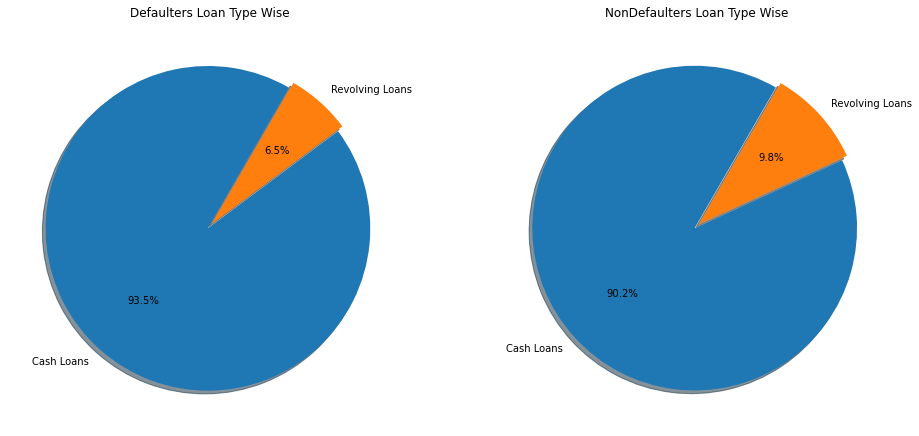

In [112]:
plt.figure(figsize = [16,8])

plt.subplot(121)
plt.pie(defaulters["NAME_CONTRACT_TYPE"].value_counts(), autopct='%1.1f%%', 
        startangle = 60, shadow = True, labels = ["Cash Loans", "Revolving Loans"], explode=[.02,.02])
plt.title("Defaulters Loan Type Wise")

plt.subplot(122)
plt.pie(nondefaulters["NAME_CONTRACT_TYPE"].value_counts(), autopct='%1.1f%%', 
        startangle = 60, shadow = True, labels = ["Cash Loans", "Revolving Loans"], explode=[.02,.02])
plt.title("NonDefaulters Loan Type Wise")

plt.show()

In [ ]:
# Observations-

# 1. Majority of defaulters are defaulting on Cash Loans compared to Revolving loans.

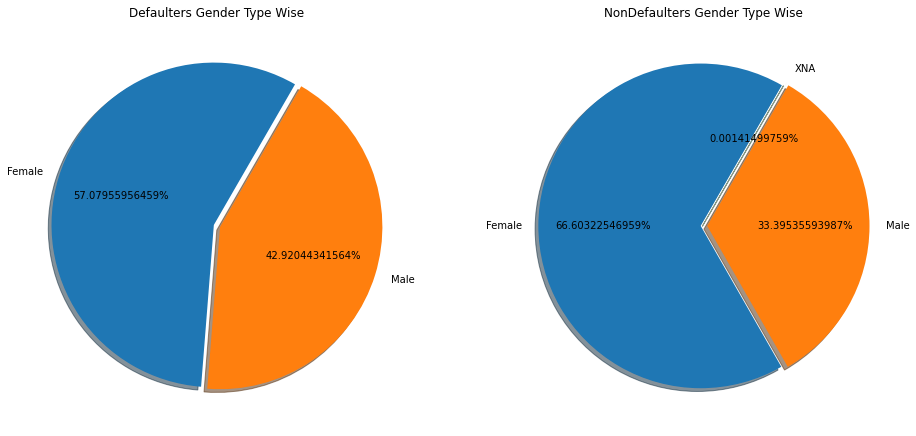

In [113]:
plt.figure(figsize = [16,8])

plt.subplot(121)
plt.pie(defaulters["CODE_GENDER"].value_counts(), autopct='%1.11f%%', 
        startangle = 60, shadow = True, labels = ["Female", "Male"], explode=[.02,.02])
plt.title("Defaulters Gender Type Wise")

plt.subplot(122)
plt.pie(nondefaulters["CODE_GENDER"].value_counts(), autopct='%1.11f%%', 
        startangle = 60, shadow = True, labels = ["Female", "Male", "XNA"], explode=[.02,.02,.02])
plt.title("NonDefaulters Gender Type Wise")

plt.show()

In [ ]:
# Observations-

# 1. Majority of defaulters are male compared to female.

In [114]:
defaulters["CODE_GENDER"].value_counts(normalize=True)

F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64

In [115]:
defaulters[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,2.482500e+04,2.482500e+04,24825.000000,2.482500e+04
mean,1.656118e+05,5.577785e+05,26481.744290,4.889394e+05
std,7.466770e+05,3.464332e+05,12450.676999,3.115067e+05
min,2.565000e+04,4.500000e+04,2722.500000,4.500000e+04
25%,1.125000e+05,2.844000e+05,17361.000000,2.385000e+05
50%,1.350000e+05,4.975200e+05,25263.000000,4.500000e+05
75%,2.025000e+05,7.333155e+05,32976.000000,6.750000e+05
max,1.170000e+08,4.027680e+06,149211.000000,3.600000e+06


In [116]:
defaulters[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
AMT_INCOME_TOTAL,1.000000,0.038131,0.046421,0.037591
AMT_CREDIT,0.038131,1.000000,0.752195,0.982783
AMT_ANNUITY,0.046421,0.752195,1.000000,0.752295
AMT_GOODS_PRICE,0.037591,0.982783,0.752295,1.000000


In [4]:
prev_app_data = pd.read_csv("C:\\upGrad_DataScience\\Credit_EDA_CaseStudy\\previous_application.csv")
prev_app_data.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
prev_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [119]:
## Columns "DAYS_DECISION", "DAYS_FIRST_DRAWING", "DAYS_FIRST_DUE", "DAYS_LAST_DUE_1ST_VERSION", "DAYS_LAST_DUE" and 
## "DAYS_TERMINATION" are having negative values, which doesn't look correct. So, convert these values to positive values.

prev_app_data["DAYS_DECISION"] = abs(prev_app_data["DAYS_DECISION"])
prev_app_data["DAYS_FIRST_DRAWING"] = abs(prev_app_data["DAYS_FIRST_DRAWING"])
prev_app_data["DAYS_FIRST_DUE"] = abs(prev_app_data["DAYS_FIRST_DUE"])
prev_app_data["DAYS_LAST_DUE_1ST_VERSION"] = abs(prev_app_data["DAYS_LAST_DUE_1ST_VERSION"])
prev_app_data["DAYS_LAST_DUE"] = abs(prev_app_data["DAYS_LAST_DUE"])
prev_app_data["DAYS_TERMINATION"] = abs(prev_app_data["DAYS_TERMINATION"])

In [120]:
# combined_data = pd.merge(customer_data, prev_app_data, on='SK_ID_CURR', how='inner')
combined_data = pd.merge(customer_data, prev_app_data, how='inner', left_index=True, right_index=True, suffixes=('', '_drop'))
combined_data.sort_values(by=['SK_ID_CURR','SK_ID_PREV'],ascending=[True,True],inplace=True)
combined_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,SK_ID_PREV,SK_ID_CURR_drop,NAME_CONTRACT_TYPE_drop,AMT_ANNUITY_drop,AMT_APPLICATION,AMT_CREDIT_drop,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_drop,WEEKDAY_APPR_PROCESS_START_drop,HOUR_APPR_PROCESS_START_drop,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_drop,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,10,6,3,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,3,1,2,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,12,7,2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY

In [121]:
combined_data.drop([col for col in combined_data.columns if 'drop' in col], axis=1, inplace=True)

In [122]:
combined_data.drop_duplicates(subset='SK_ID_CURR',inplace=True,keep='last')
combined_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,SK_ID_PREV,AMT_APPLICATION,AMT_DOWN_PAYMENT,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,10,6,3,2030495,17145.0,0.0,Y,1,0.0,0.182832,0.867336,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46,3,3,1,2,2802425,607500.0,NaN,Y,1,NaN,NaN,NaN,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,1,12,7,2,2523466,112500.0,NaN,Y,1,NaN,NaN,NaN,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,8,27,7,2,2819243,450000.0,NaN,Y,1,NaN,NaN,NaN,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21

In [123]:
## Columns "YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_REGISTRATION", "YEARS_ID_PUBLISH" and "YEARS_LAST_PHONE_CHANGE" are 
## having negative values, which doesn't look correct. So, convert these values to positive values.

combined_data["YEARS_BIRTH"] = abs(combined_data["YEARS_BIRTH"])
combined_data["YEARS_EMPLOYED"] = abs(combined_data["YEARS_EMPLOYED"])
combined_data["YEARS_REGISTRATION"] = abs(combined_data["YEARS_REGISTRATION"])
combined_data["YEARS_ID_PUBLISH"] = abs(combined_data["YEARS_ID_PUBLISH"])
combined_data["YEARS_LAST_PHONE_CHANGE"] = abs(combined_data["YEARS_LAST_PHONE_CHANGE"])

In [124]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 100 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13

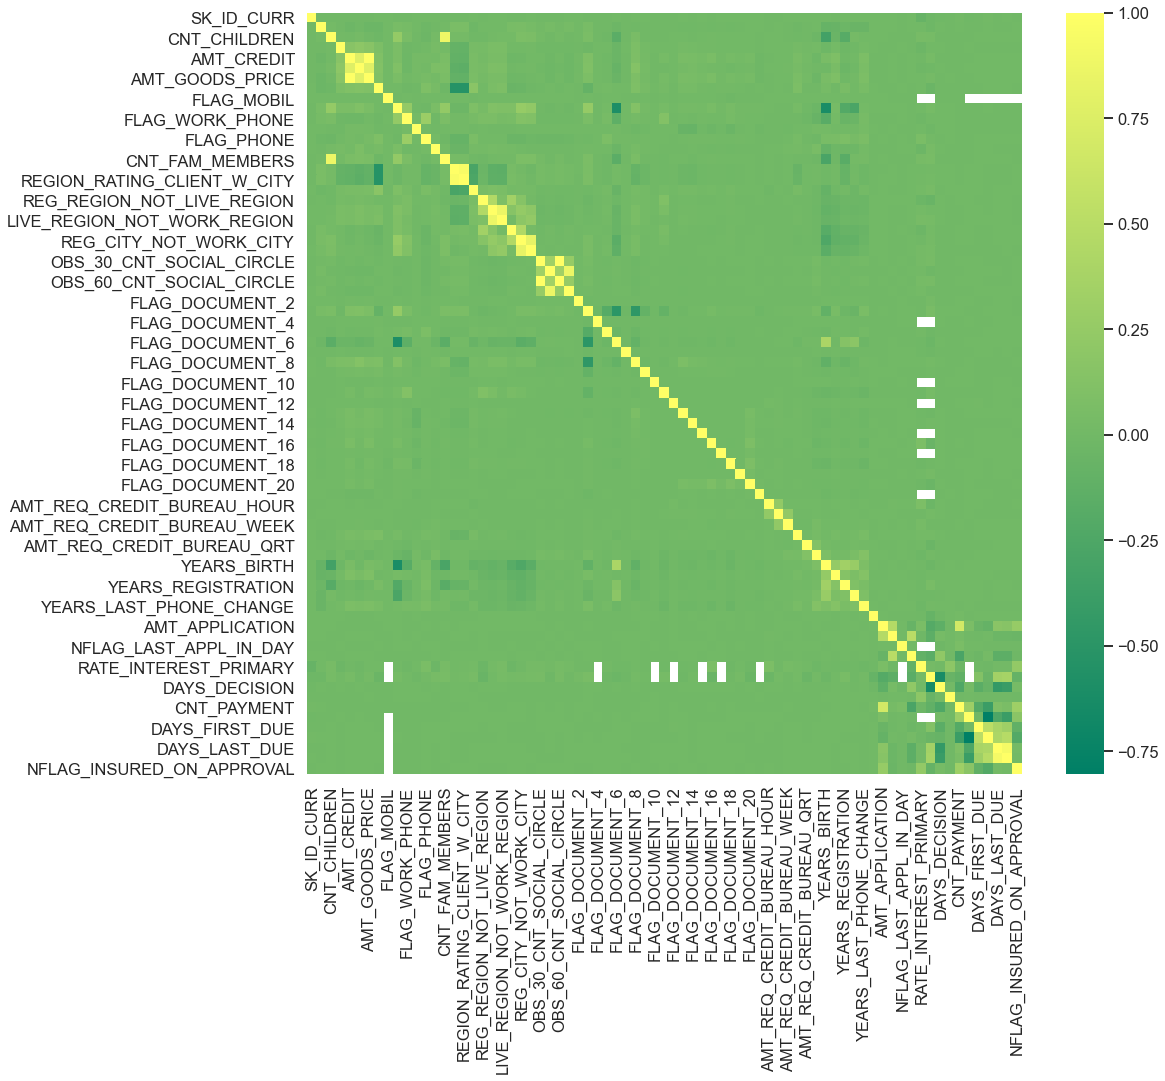

In [169]:
## plot a graph showing correlation between numeric columns
corrmat = combined_data.corr() 
  
f, ax = plt.subplots(figsize =(16, 14)) 
sns.heatmap(corrmat, ax = ax, cmap ="summer") 
plt.show()

In [126]:
combined_data[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
AMT_INCOME_TOTAL,1.000000,0.156870,0.191657,0.159632
AMT_CREDIT,0.156870,1.000000,0.770138,0.986734
AMT_ANNUITY,0.191657,0.770138,1.000000,0.774848
AMT_GOODS_PRICE,0.159632,0.986734,0.774848,1.000000


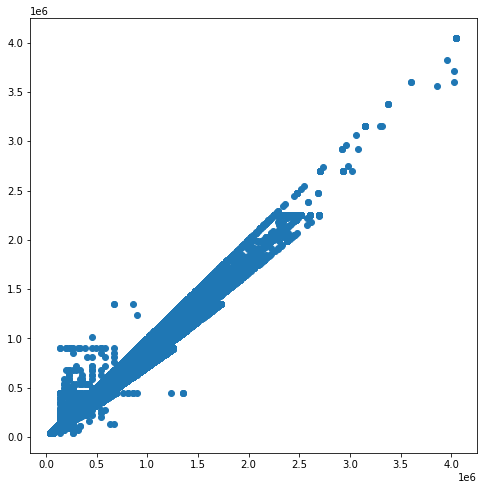

In [127]:
plt.figure(figsize = [8,8])
plt.scatter(combined_data["AMT_CREDIT"], combined_data["AMT_GOODS_PRICE"])
plt.show()

In [ ]:
# Observations-

# 1. There is strong correlation between "AMT_CREDIT" and "AMt_GOODS_PRICE".

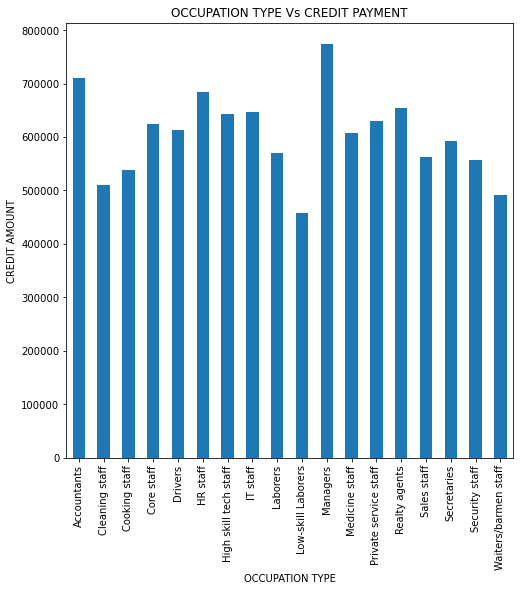

In [128]:
plt.figure(figsize = [8,8])
combined_data.groupby(["OCCUPATION_TYPE"])["AMT_CREDIT"].mean().plot.bar()
plt.xlabel("OCCUPATION TYPE")
plt.ylabel("CREDIT AMOUNT")
plt.title("OCCUPATION TYPE Vs CREDIT PAYMENT")
plt.show()

In [ ]:
# Observations-

# 1. "Managers", "Accountants" and "HR Staff" are getting highest credit amount.
# 2. "Low Skill Laborers", "Cleaning Staff" and "waiter" are getting lowest credit amount.

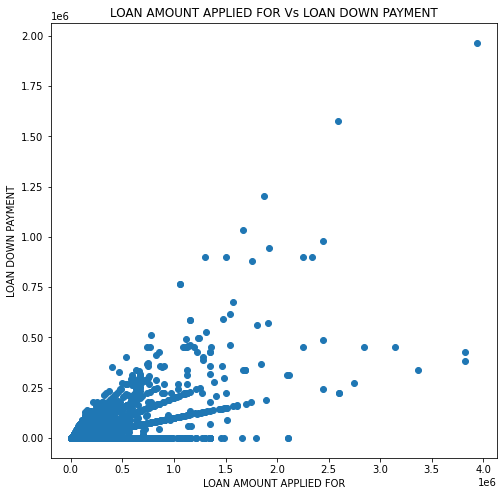

In [129]:
plt.figure(figsize = [8,8])
plt.scatter(combined_data["AMT_APPLICATION"], combined_data["AMT_DOWN_PAYMENT"])
plt.xlabel("LOAN AMOUNT APPLIED FOR")
plt.ylabel("LOAN DOWN PAYMENT")
plt.title("LOAN AMOUNT APPLIED FOR Vs LOAN DOWN PAYMENT")
plt.show()

In [ ]:
# Observations-

# 1. There is strong correlation between loan amount and down payment.
# 2. There are some outliers, which needs to be reviewed why they are asked to pay higher down payment.

In [130]:
combined_data["AMT_APPLICATION"].describe()

count    3.075110e+05
mean     1.712704e+05
std      2.869037e+05
min      0.000000e+00
25%      2.019600e+04
50%      7.056000e+04
75%      1.800000e+05
max      3.935970e+06
Name: AMT_APPLICATION, dtype: float64

In [131]:
combined_data["AMT_DOWN_PAYMENT"].describe()

count    1.475360e+05
mean     6.686938e+03
std      1.948948e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.710000e+03
75%      7.753500e+03
max      1.964970e+06
Name: AMT_DOWN_PAYMENT, dtype: float64

In [132]:
prev_app_data["CODE_REJECT_REASON"].value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

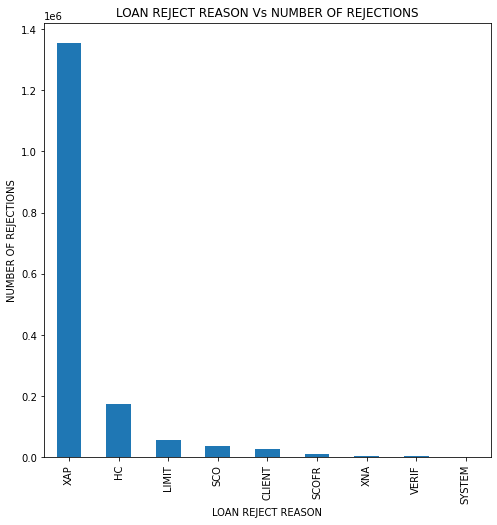

In [133]:
plt.figure(figsize = [8,8])
prev_app_data["CODE_REJECT_REASON"].value_counts().plot.bar()
plt.xlabel("LOAN REJECT REASON")
plt.ylabel("NUMBER OF REJECTIONS")
plt.title("LOAN REJECT REASON Vs NUMBER OF REJECTIONS")
plt.show()

In [ ]:
# Observations-

# 1. Maximum number of loans are rejecting due to reason of "XAP"

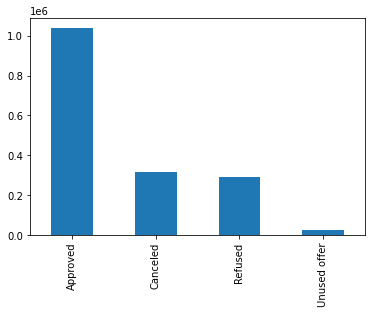

In [134]:
prev_app_data["NAME_CONTRACT_STATUS"].value_counts().plot.bar()
# sns.histplot(data = prev_app_data["NAME_CONTRACT_STATUS"].value_counts())
# !pip install -U seaborn

In [ ]:
# Observations-

# 1. There are more number of "Refused" loan offers than "Cancelled" loan offers. Bank needs to identify reasons behind it.

In [135]:
prev_app_data["DAYS_DECISION"].value_counts()

245     2444
238     2390
210     2375
273     2350
196     2315
224     2305
252     2300
182     2283
240     2279
231     2270
183     2268
239     2241
259     2232
217     2205
266     2201
209     2193
203     2182
280     2175
189     2171
287     2170
294     2170
211     2152
181     2148
175     2138
268     2132
270     2129
230     2125
329     2118
272     2114
244     2110
300     2109
249     2104
308     2101
276     2094
208     2092
364     2088
243     2084
260     2081
216     2079
265     2069
279     2066
269     2063
184     2056
246     2052
251     2049
188     2047
241     2046
195     2044
219     2028
236     2028
301     2027
232     2018
213     2017
267     2016
336     2016
315     2010
275     2010
237     2005
168     2003
205     1998
328     1993
229     1993
235     1991
271     1990
202     1980
197     1977
233     1976
288     1967
293     1962
330     1959
256     1956
242     1953
264     1952
257     1950
350     1949
212     1949
176     1949

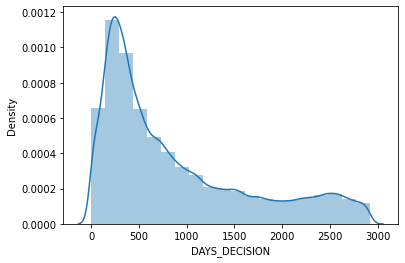

In [136]:
sns.distplot(prev_app_data["DAYS_DECISION"], bins= 20)

In [ ]:
# Observations-

# 1. Normally, Loan decisions are being taken in about 250 to 1000 days.

In [137]:
prev_app_data["DAYS_DECISION"].describe()

count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

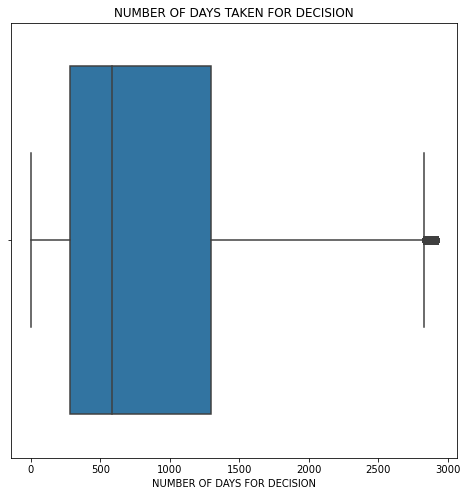

In [138]:
plt.figure(figsize = [8,8])
# plt.scatter(prev_app_data["AMT_APPLICATION"], prev_app_data["DAYS_DECISION"])
sns.boxplot(prev_app_data["DAYS_DECISION"])
plt.xlabel("NUMBER OF DAYS FOR DECISION")
plt.title("NUMBER OF DAYS TAKEN FOR DECISION")
plt.show()

In [ ]:
# Observations-

# 1. Normally, Loan decisions are being taken in about 250 to 1000 days.

<Figure size 576x576 with 0 Axes>

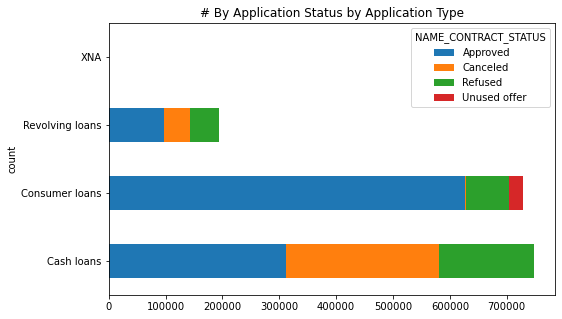

In [6]:
plt.figure(figsize = [8, 8])
ax = pd.crosstab(prev_app_data["NAME_CONTRACT_TYPE"],prev_app_data["NAME_CONTRACT_STATUS"]).plot(kind="barh",figsize=(8,5),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("# By Application Status by Application Type")
plt.show()

In [ ]:
# Observations-

# 1. More “Cancellations” in cash loans.
# 2. Highest “Approvals” in Consumer loans.

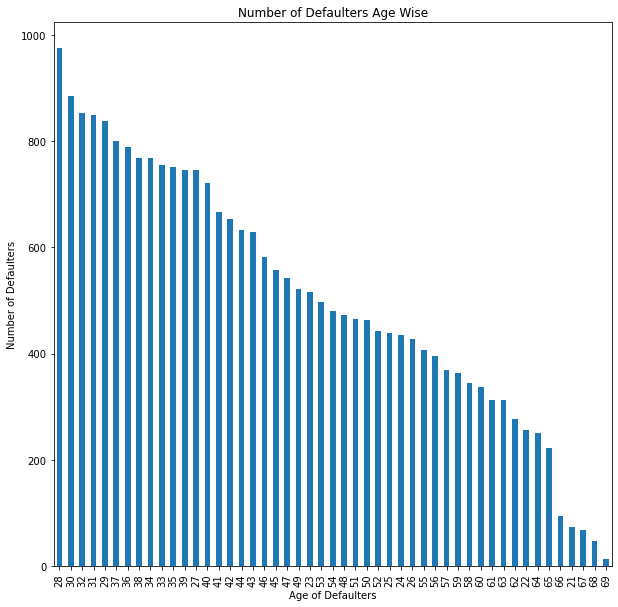

In [139]:
plt.figure(figsize = [10,10])
defaulters["YEARS_BIRTH"].value_counts().plot.bar()
plt.xlabel("Age of Defaulters")
plt.ylabel("Number of Defaulters")
plt.title("Number of Defaulters Age Wise")
plt.show()

In [ ]:
# Observations-

# 1. Customers in age group of 28 to 40 tends to default more compared to other age groups.
# 2. A specific age group of 21 years is having very low percentage of defaluting. Bank needs to identify the reason for it.

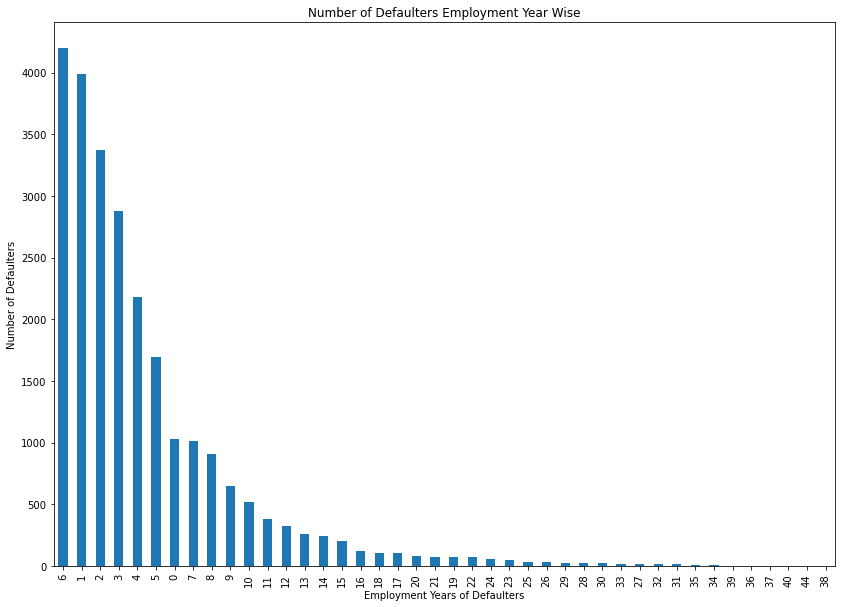

In [141]:
plt.figure(figsize = [14,10])
defaulters["YEARS_EMPLOYED"].value_counts().plot.bar()
plt.xlabel("Employment Years of Defaulters")
plt.ylabel("Number of Defaulters")
plt.title("Number of Defaulters Employment Year Wise")
plt.show()

In [ ]:
# Observations-

# 1. Customers having employment experience of 0 to 6 years tends to default more compared to other experienced customers.

In [142]:
defaulters.groupby(["NAME_CONTRACT_TYPE"])["YEARS_BIRTH"].value_counts()

NAME_CONTRACT_TYPE  YEARS_BIRTH
Cash loans          28             926
                    30             844
                    32             803
                    29             800
                    31             793
                    37             766
                    36             749
                    34             727
                    38             727
                    35             715
                    33             704
                    39             699
                    40             688
                    27             686
                    41             635
                    42             607
                    43             601
                    44             589
                    46             544
                    45             526
                    47             504
                    49             489
                    53             474
                    54             458
                    48          

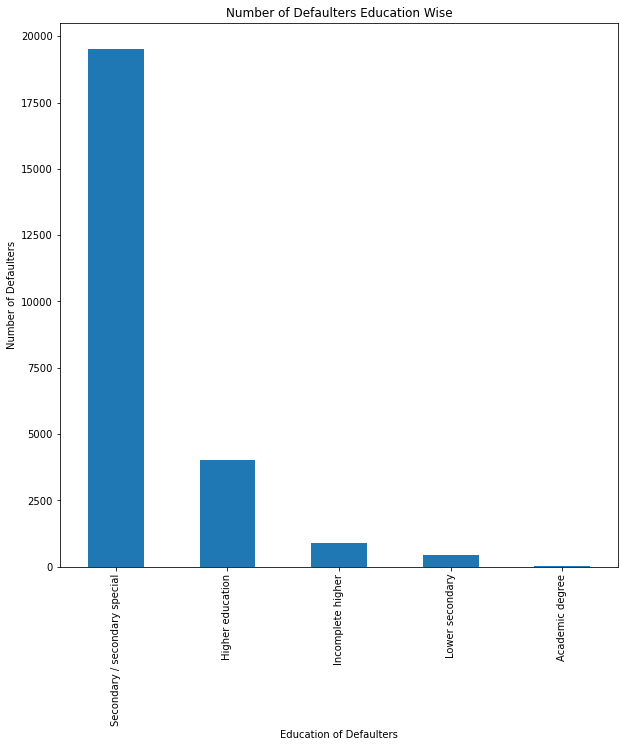

In [143]:
plt.figure(figsize = [10,10])
defaulters["NAME_EDUCATION_TYPE"].value_counts().plot.bar()
plt.xlabel("Education of Defaulters")
plt.ylabel("Number of Defaulters")
plt.title("Number of Defaulters Education Wise")
plt.show()

In [ ]:
# Observations-

# 1. Customers having educational background of "Seconddary / Secondary Special" tends to default more compared 
#    to other educational background.
# 2. Customers having educational background of "Acedemic Degree" tends to pay annuity regularly.

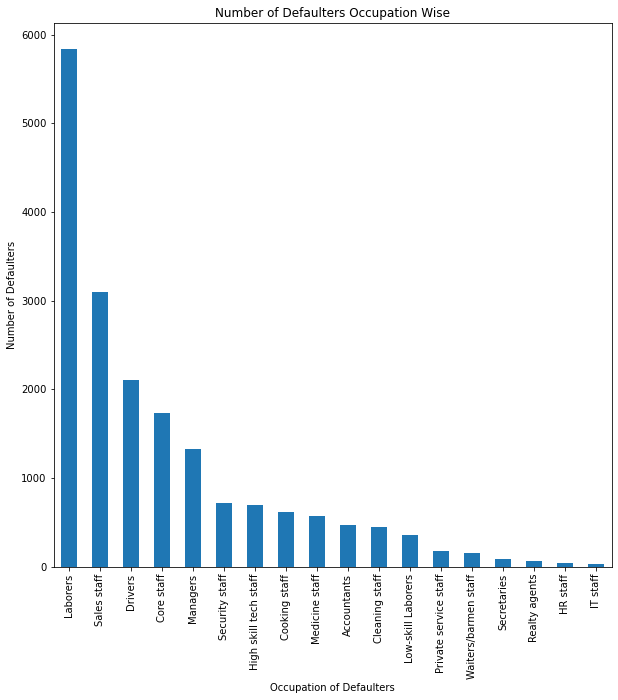

In [144]:
plt.figure(figsize = [10,10])
defaulters["OCCUPATION_TYPE"].value_counts().plot.bar()
plt.xlabel("Occupation of Defaulters")
plt.ylabel("Number of Defaulters")
plt.title("Number of Defaulters Occupation Wise")
plt.show()

In [ ]:
# Observations-

# 1. Customers having occupation as laborers, sales staff, drivers and core staff tends to default more compared to 
#   other occupations.
# 2. Customers having occupation as HR staff and IT staff tend to pay annuity regularly.

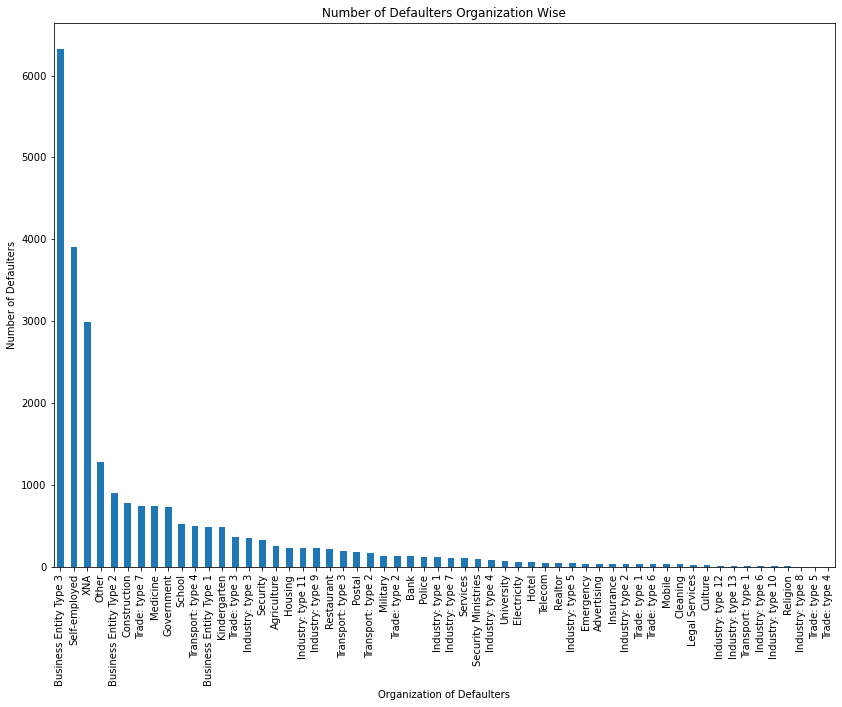

In [145]:
plt.figure(figsize = [14,10])
defaulters["ORGANIZATION_TYPE"].value_counts().plot.bar()
plt.xlabel("Organization of Defaulters")
plt.ylabel("Number of Defaulters")
plt.title("Number of Defaulters Organization Wise")
plt.show()

In [ ]:
# Observations-

# 1. Customers working at business entity type3 and self-employed tends to default more compared to other organizations.
# 2. Customers working at industry type 8, trade type 5 and trade type 4 tend to pay annuity regularly.

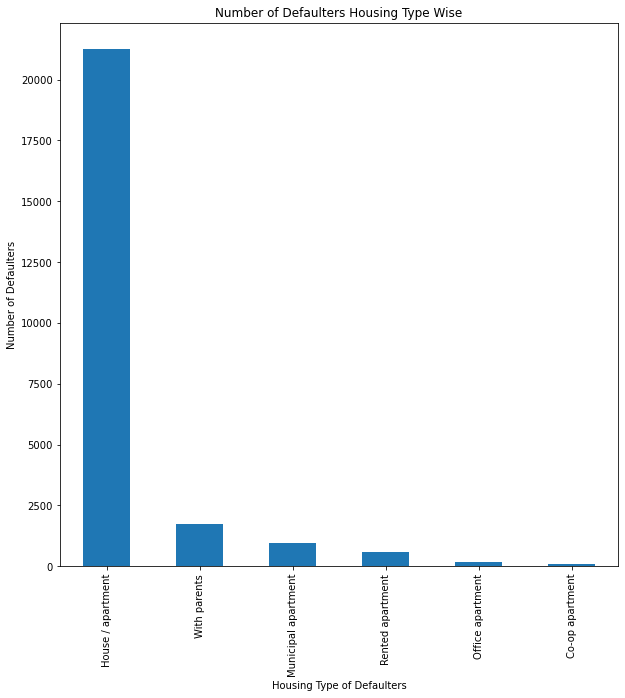

In [146]:
plt.figure(figsize = [10,10])
defaulters["NAME_HOUSING_TYPE"].value_counts().plot.bar()
plt.xlabel("Housing Type of Defaulters")
plt.ylabel("Number of Defaulters")
plt.title("Number of Defaulters Housing Type Wise")
plt.show()

In [ ]:
# Observations-

# 1. Customers staying in house/apartment or with parents tend to default more compared to other type of accomodation.
# 2. Customers working at industry type 8, trade type 5 and trade type 4 tend to pay annuity regularly.

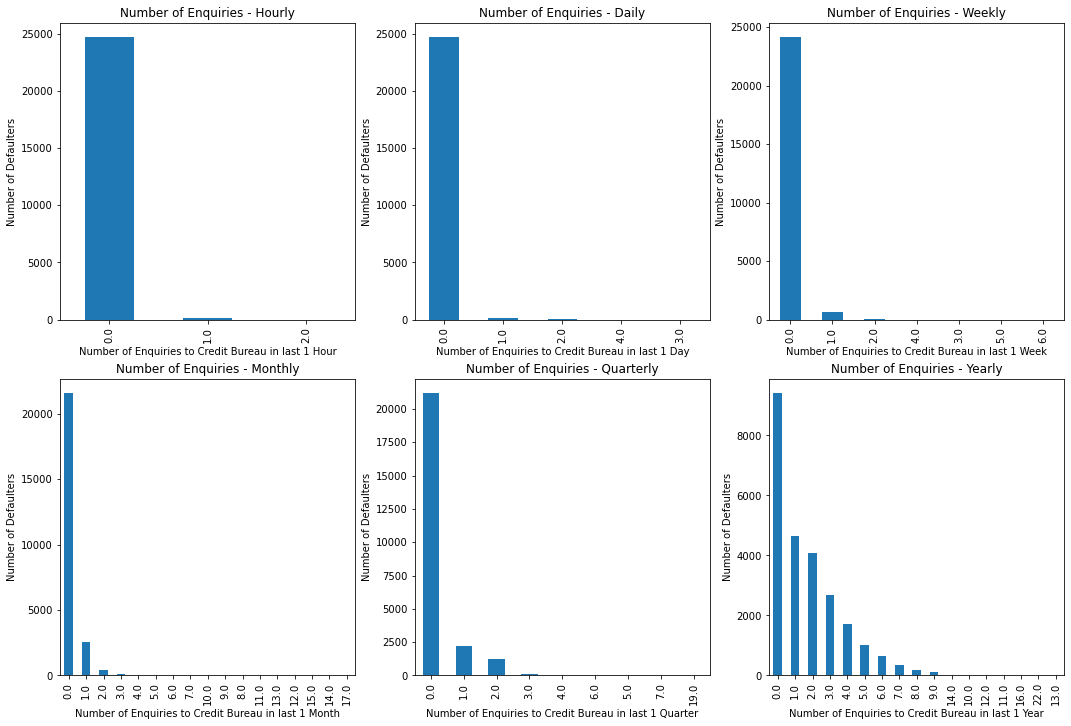

In [147]:
fig = plt.figure (figsize = [18,12])

fig.add_subplot(231)
defaulters["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts().plot.bar()
plt.xlabel("Number of Enquiries to Credit Bureau in last 1 Hour")
plt.ylabel("Number of Defaulters")
plt.title("Number of Enquiries - Hourly")

fig.add_subplot(232)
defaulters["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts().plot.bar()
plt.xlabel("Number of Enquiries to Credit Bureau in last 1 Day")
plt.ylabel("Number of Defaulters")
plt.title("Number of Enquiries - Daily")

fig.add_subplot(233)
defaulters["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts().plot.bar()
plt.xlabel("Number of Enquiries to Credit Bureau in last 1 Week")
plt.ylabel("Number of Defaulters")
plt.title("Number of Enquiries - Weekly")

fig.add_subplot(234)
defaulters["AMT_REQ_CREDIT_BUREAU_MON"].value_counts().plot.bar()
plt.xlabel("Number of Enquiries to Credit Bureau in last 1 Month")
plt.ylabel("Number of Defaulters")
plt.title("Number of Enquiries - Monthly")

fig.add_subplot(235)
defaulters["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts().plot.bar()
plt.xlabel("Number of Enquiries to Credit Bureau in last 1 Quarter")
plt.ylabel("Number of Defaulters")
plt.title("Number of Enquiries - Quarterly")

fig.add_subplot(236)
defaulters["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts().plot.bar()
plt.xlabel("Number of Enquiries to Credit Bureau in last 1 Year")
plt.ylabel("Number of Defaulters")
plt.title("Number of Enquiries - Yearly")

plt.show()

In [ ]:
# Observations-

# 1. Number of equiries for defaulters tend to be more for 1 year duration than other short term duration like a quarter, 
#    a month, a week, a day or an hour. So, Bank needs to verify enquiries done for last 1 year to know crdeit history.

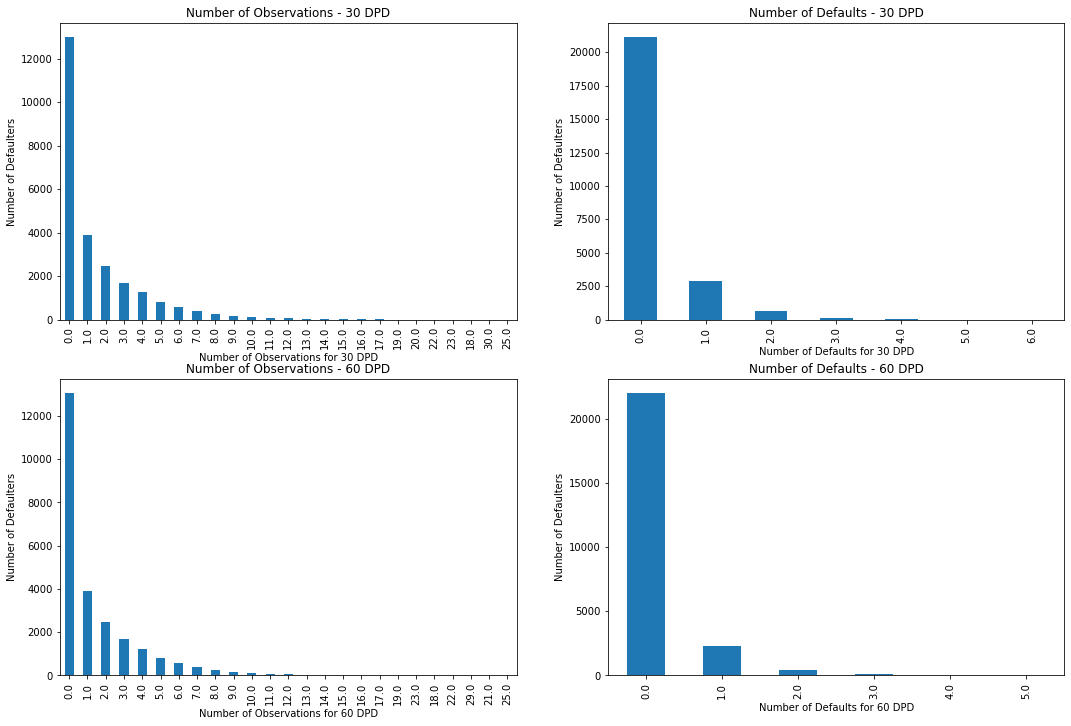

In [148]:
fig = plt.figure (figsize = [18,12])

fig.add_subplot(221)
defaulters["OBS_30_CNT_SOCIAL_CIRCLE"].value_counts().plot.bar()
plt.xlabel("Number of Observations for 30 DPD")
plt.ylabel("Number of Defaulters")
plt.title("Number of Observations - 30 DPD")

fig.add_subplot(222)
defaulters["DEF_30_CNT_SOCIAL_CIRCLE"].value_counts().plot.bar()
plt.xlabel("Number of Defaults for 30 DPD")
plt.ylabel("Number of Defaulters")
plt.title("Number of Defaults - 30 DPD")

fig.add_subplot(223)
defaulters["OBS_60_CNT_SOCIAL_CIRCLE"].value_counts().plot.bar()
plt.xlabel("Number of Observations for 60 DPD")
plt.ylabel("Number of Defaulters")
plt.title("Number of Observations - 60 DPD")

fig.add_subplot(224)
defaulters["DEF_60_CNT_SOCIAL_CIRCLE"].value_counts().plot.bar()
plt.xlabel("Number of Defaults for 60 DPD")
plt.ylabel("Number of Defaulters")
plt.title("Number of Defaults - 60 DPD")

plt.show()

In [149]:
defaulters["AMT_INCOME_TOTAL"].value_counts()

135000.0       2983
112500.0       2720
157500.0       2307
180000.0       2083
90000.0        1844
225000.0       1567
202500.0       1327
67500.0         911
270000.0        751
81000.0         563
126000.0        412
247500.0        383
121500.0        365
315000.0        349
99000.0         323
103500.0        308
144000.0        283
76500.0         272
292500.0        258
360000.0        234
171000.0        216
117000.0        214
166500.0        180
54000.0         179
72000.0         164
45000.0         149
108000.0        145
94500.0         145
450000.0        142
148500.0        135
162000.0        128
189000.0        121
85500.0         119
216000.0        117
337500.0        115
405000.0        105
130500.0        103
63000.0          98
153000.0         94
211500.0         90
58500.0          89
139500.0         80
193500.0         79
175500.0         68
382500.0         67
49500.0          60
252000.0         50
540000.0         48
184500.0         48
207000.0         45


In [150]:
defaulters["AMT_INCOME_TOTAL"].describe()

count    2.482500e+04
mean     1.656118e+05
std      7.466770e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [171]:
defaulters["INCOME_BUCKET"] =  pd.qcut(defaulters["AMT_INCOME_TOTAL"], [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])

In [174]:
combined_data["INCOME_BUCKET"] =  pd.qcut(combined_data["AMT_INCOME_TOTAL"], [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])

In [172]:
defaulters["AGE_BUCKET"] =  pd.qcut(defaulters["YEARS_BIRTH"], [0, 0.2, 0.4, 0.6, 0.8, 1], ["Young","Young Adult","Adult","Senior","Old"])

In [175]:
combined_data["AGE_BUCKET"] =  pd.qcut(combined_data["YEARS_BIRTH"], [0, 0.2, 0.4, 0.6, 0.8, 1], ["Young","Young Adult","Adult","Senior","Old"])

In [176]:
res = pd.pivot_table(data = combined_data, index = "AGE_BUCKET", columns = "INCOME_BUCKET", values = "TARGET")
res

INCOME_BUCKET,VL,L,M,H,VH
AGE_BUCKET,,,,,
Young,0.125818,0.120655,0.118845,0.103855,0.079220
Young Adult,0.105516,0.097396,0.102866,0.090297,0.072766
Adult,0.083176,0.082077,0.085006,0.078801,0.063959
Senior,0.066544,0.068916,0.067141,0.070000,0.059266
Old,0.050119,0.053685,0.052690,0.051788,0.045067


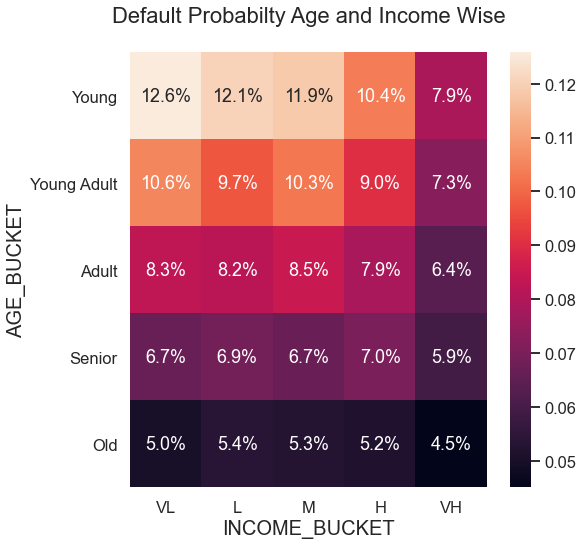

In [182]:
plt.figure(figsize = [8,8])
sns.heatmap(res, annot=True, fmt=".1%")
plt.title("Default Probabilty Age and Income Wise")
plt.show()

In [ ]:
# Observations-

# 1. The probability of defaulting is higher in group of "Young" and "Young Adult" having income as "Very Low" and "Low".
# 2. Overall, the probability of defaulting is lowest in group of "Old" people.

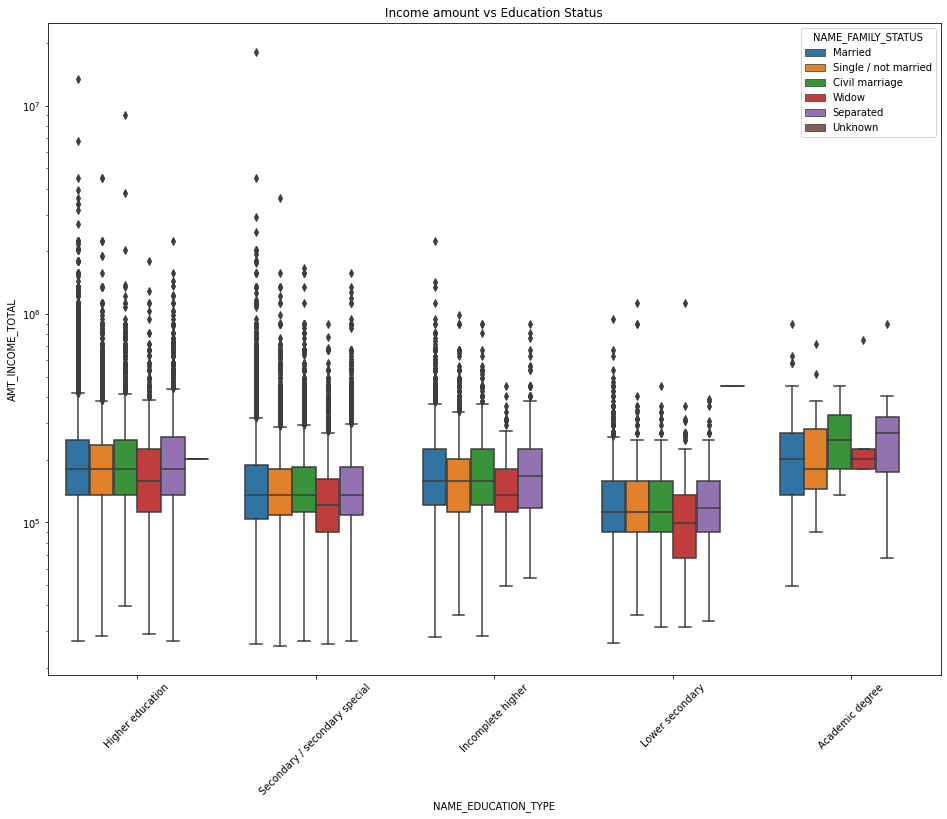

In [157]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data = nondefaulters, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

In [ ]:
# Observations-
#1.For Education type 'Higher education' the income amount is mostly equal with family status.
#2.It does contain many outliers.
#3.Less outlier are having for Academic degree but there income amount is little higher than Higher education.
#4.Lower secondary of civil marriage family status are have less income amount than others.

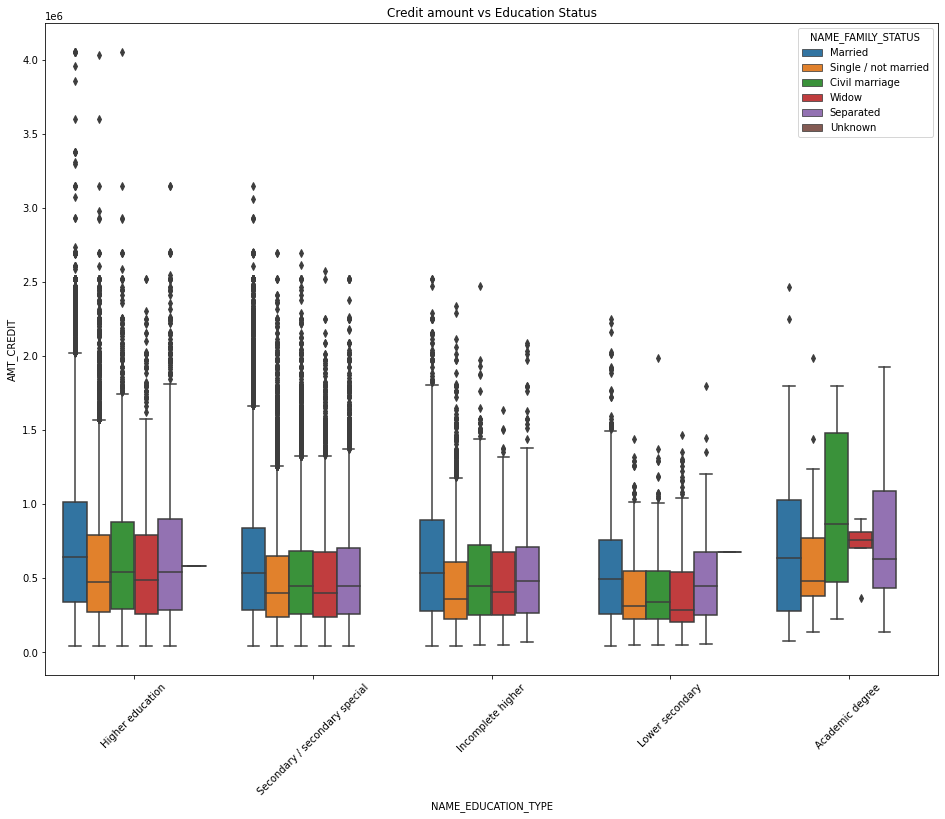

In [158]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data = nondefaulters, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

In [ ]:
## Observations-
#1.Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of loans than others.

#2. higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.

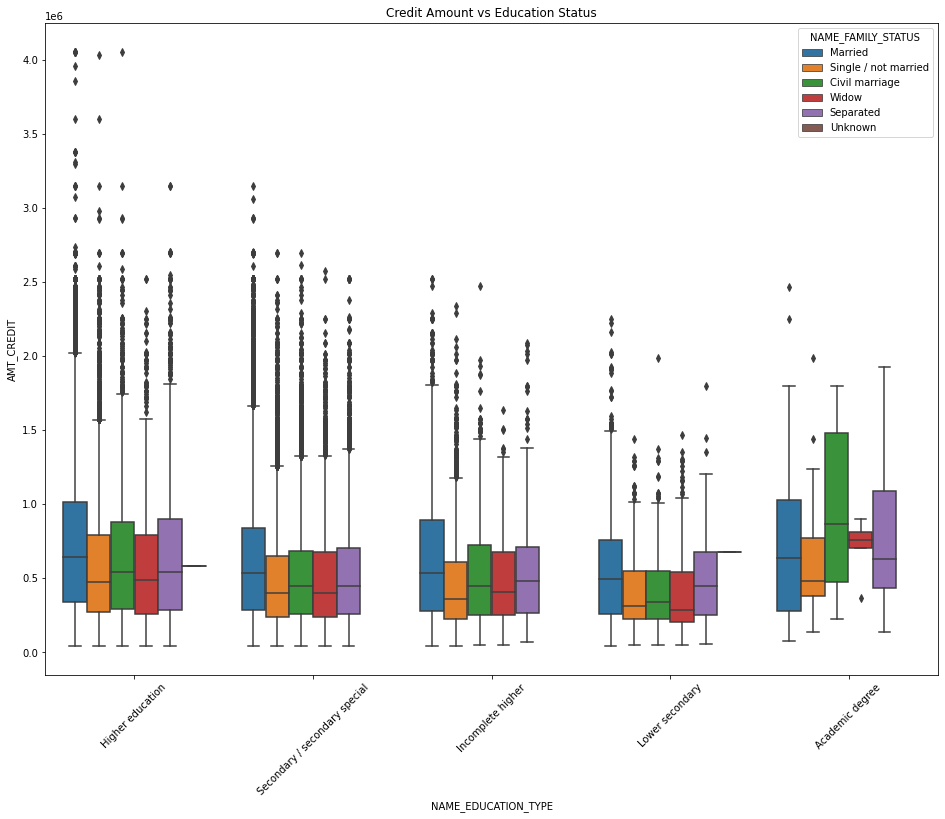

In [159]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data = nondefaulters, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

In [ ]:
## Observations-
#1.Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of loans than others.

#2.Most of the outliers are from Education type 'Higher education' and 'Secondary'.

#3.Civil marriage for Academic degree is having most of the loans.

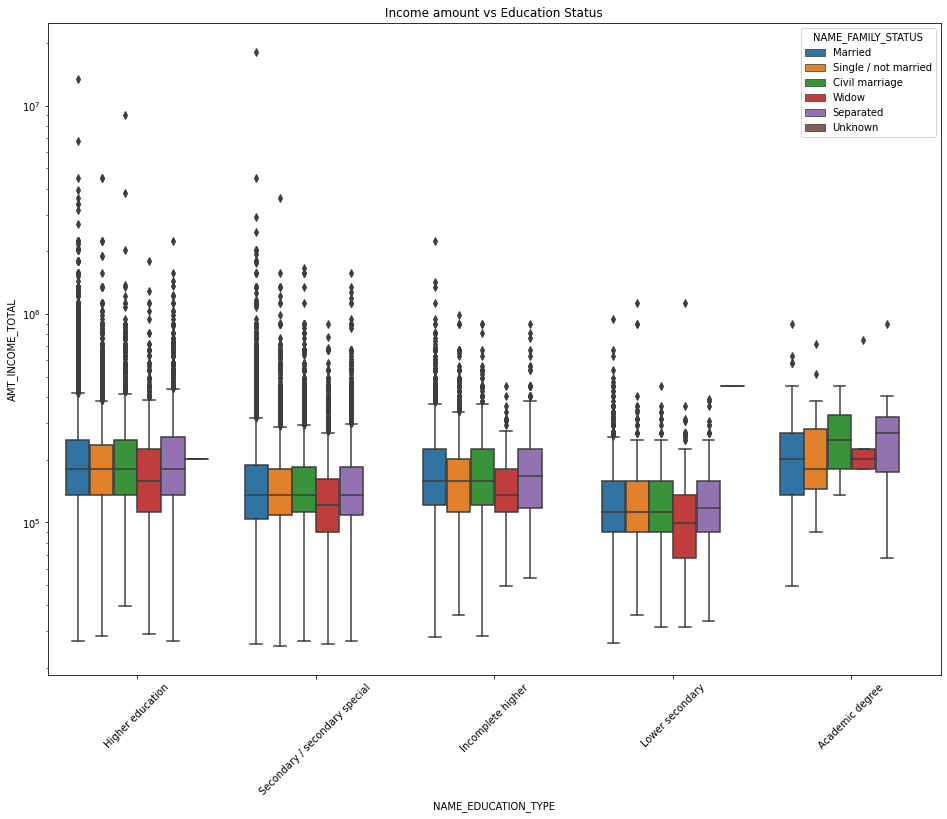

In [160]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data = nondefaulters, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

In [ ]:
## Observations-
#1.Education type 'Higher education' the income amount is mostly equal with family status.

#2.Less outlier are having for Academic degree but there income amount is little higher than Higher education.

#3.Lower secondary are have less income amount than others.

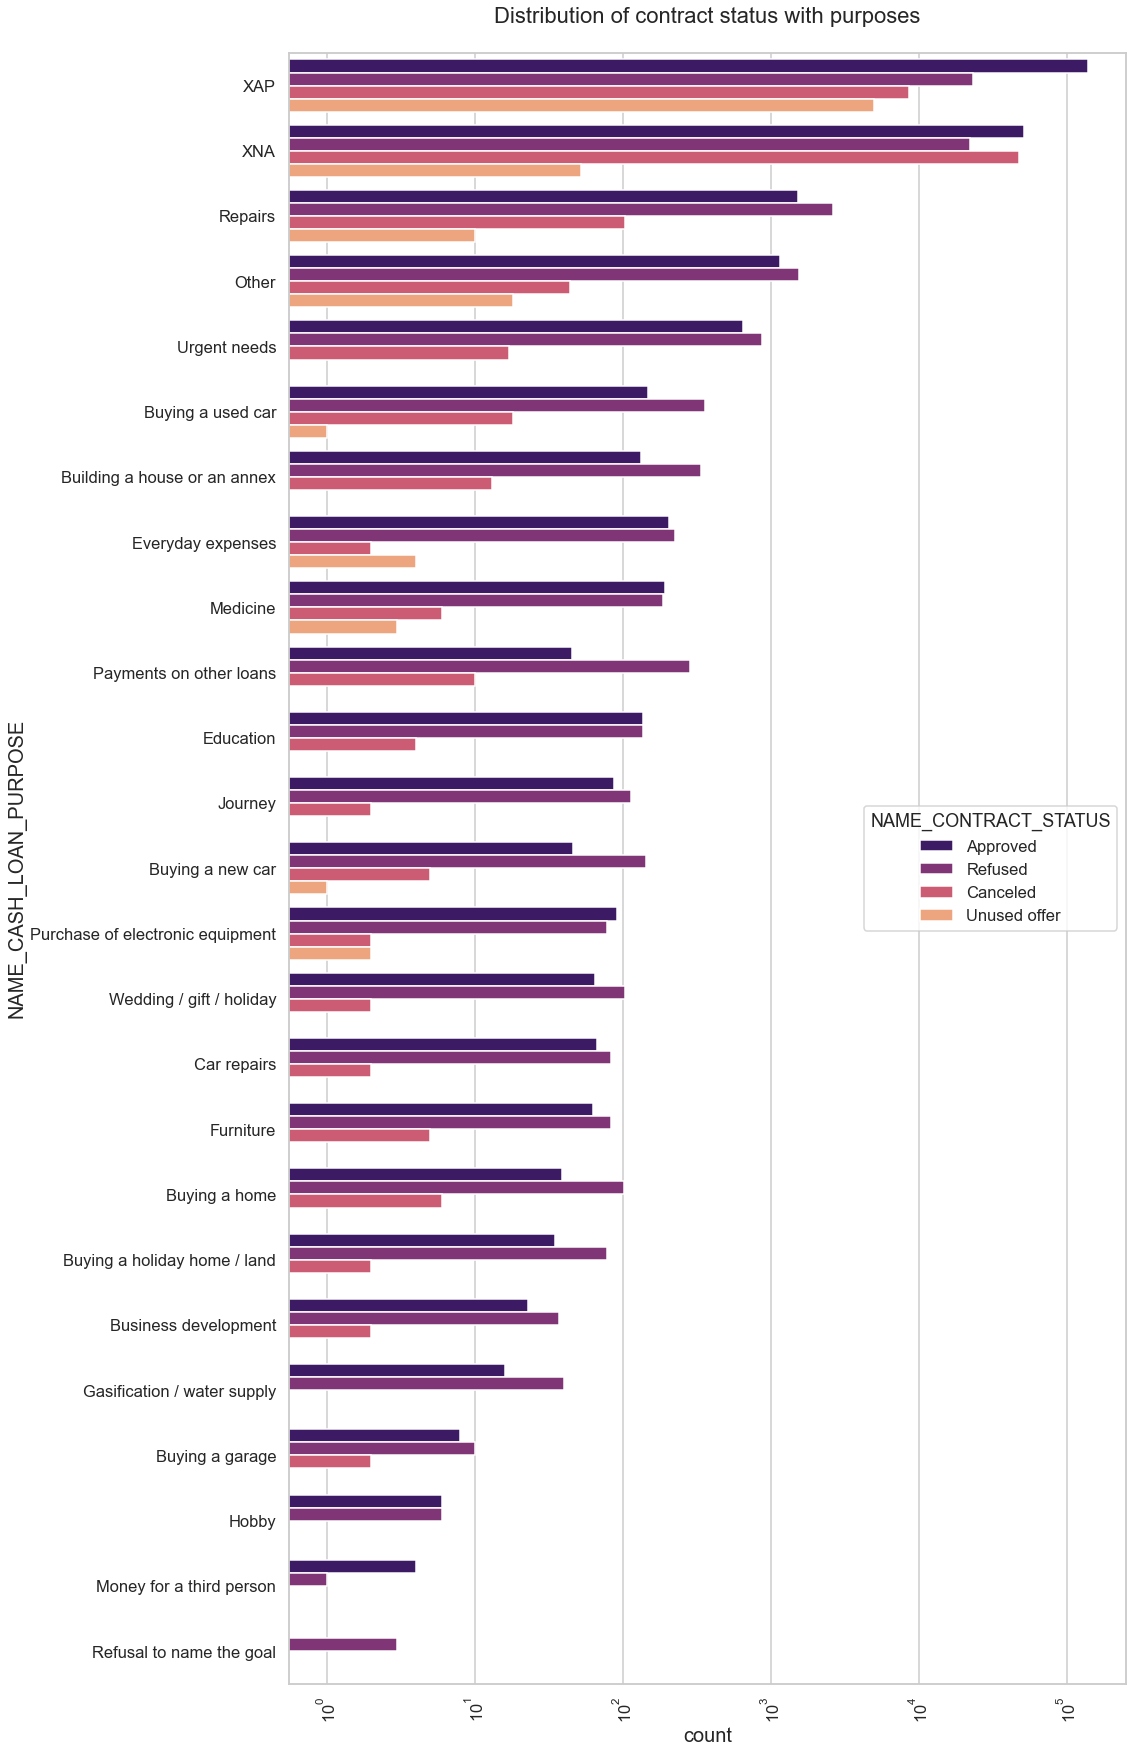

In [162]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = combined_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=combined_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
                   hue = 'NAME_CONTRACT_STATUS',palette='magma')

In [ ]:
#Observations :

#1.Most rejection of loans came from purpose 'repairs'.
#2.For education purposes we have equal number of approves and rejection
#3.Payign other loans and buying a new car is having significant higher rejection than approves.

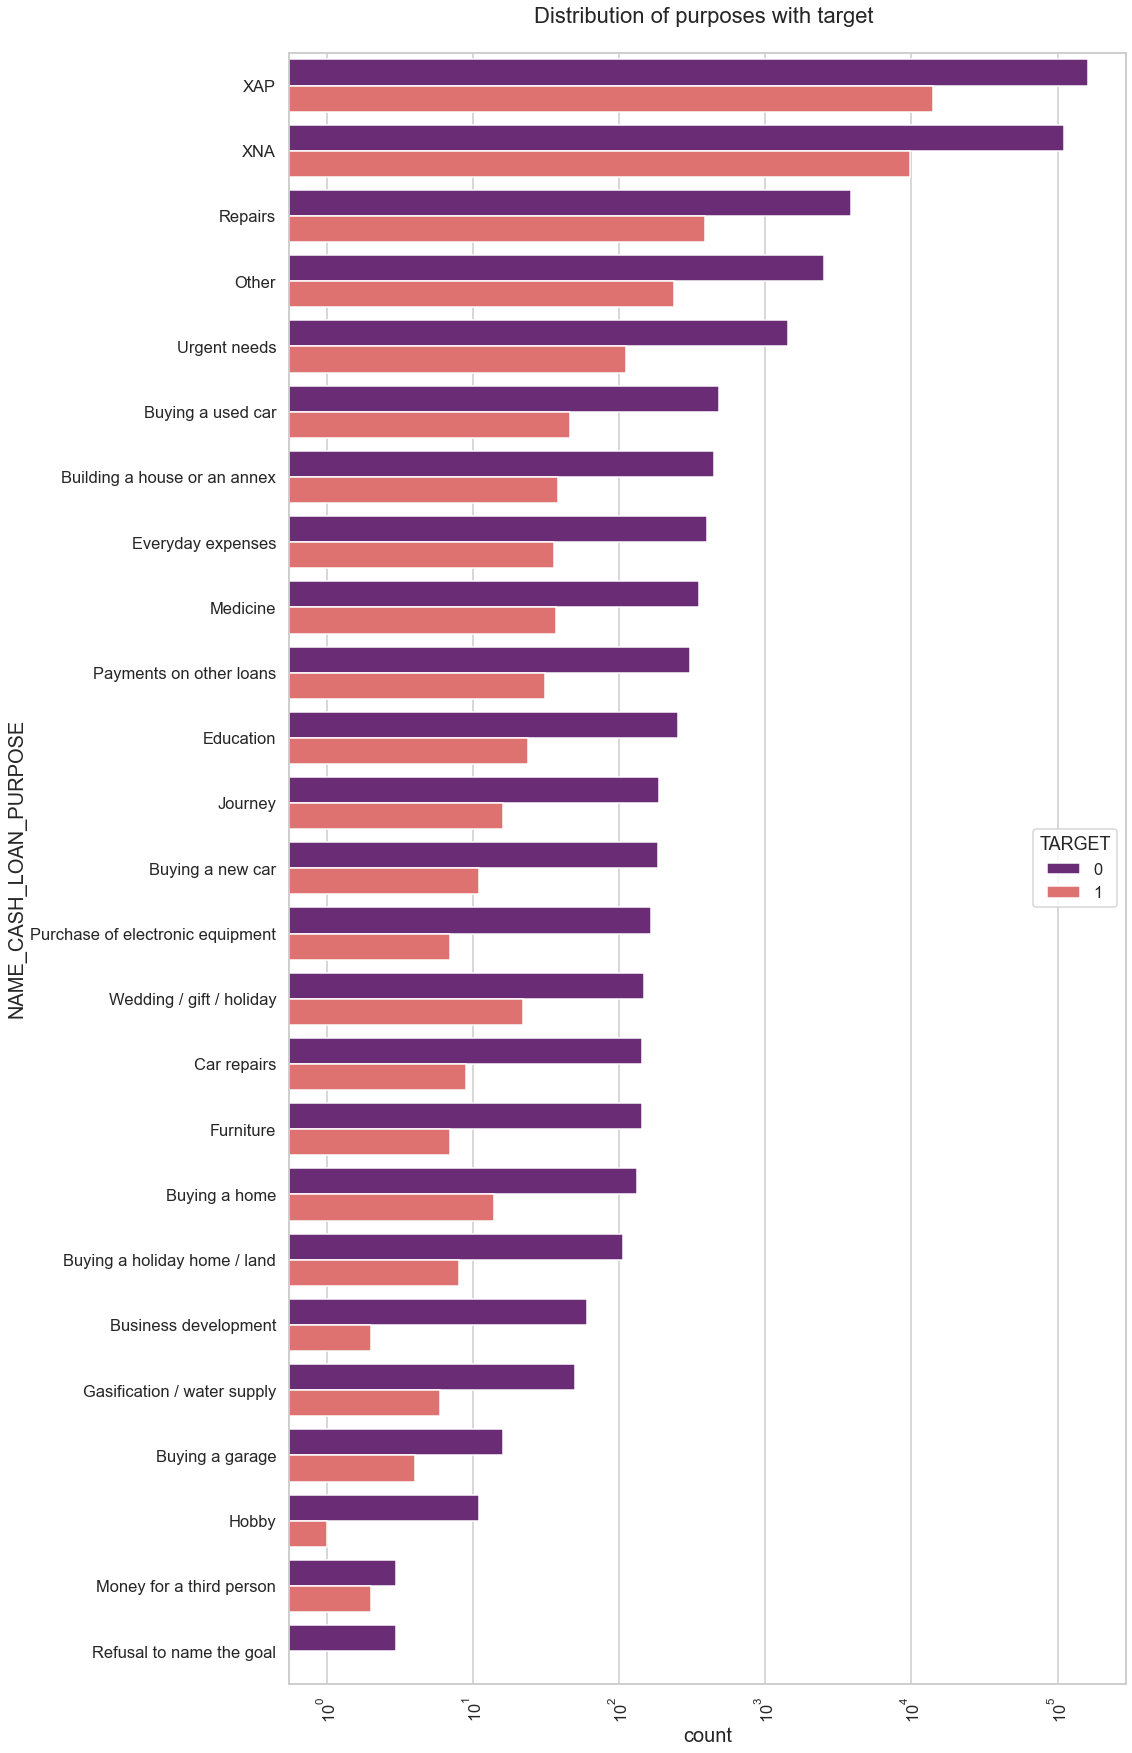

In [163]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = combined_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=combined_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')

In [ ]:
## Observatios :
#1.Loan purposes with 'Repairs' are facing more difficulites in payment on time.

#2.There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 
#'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which 
#the client is having for minimal payment difficulties.

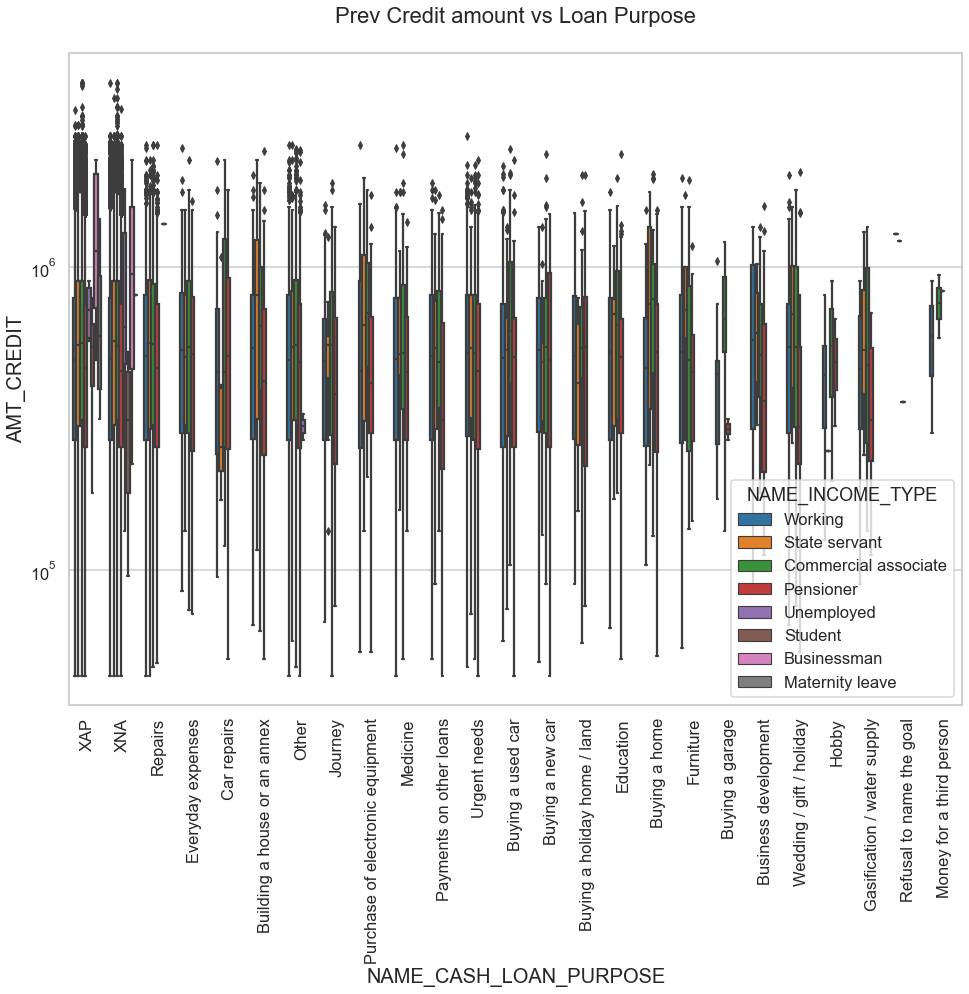

In [165]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data = combined_data, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

In [ ]:
# Observations -

#1.The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
#2.Income type of state servants have a significant amount of credit applied
#3.Money for third person or a Hobby is having less credits applied for.

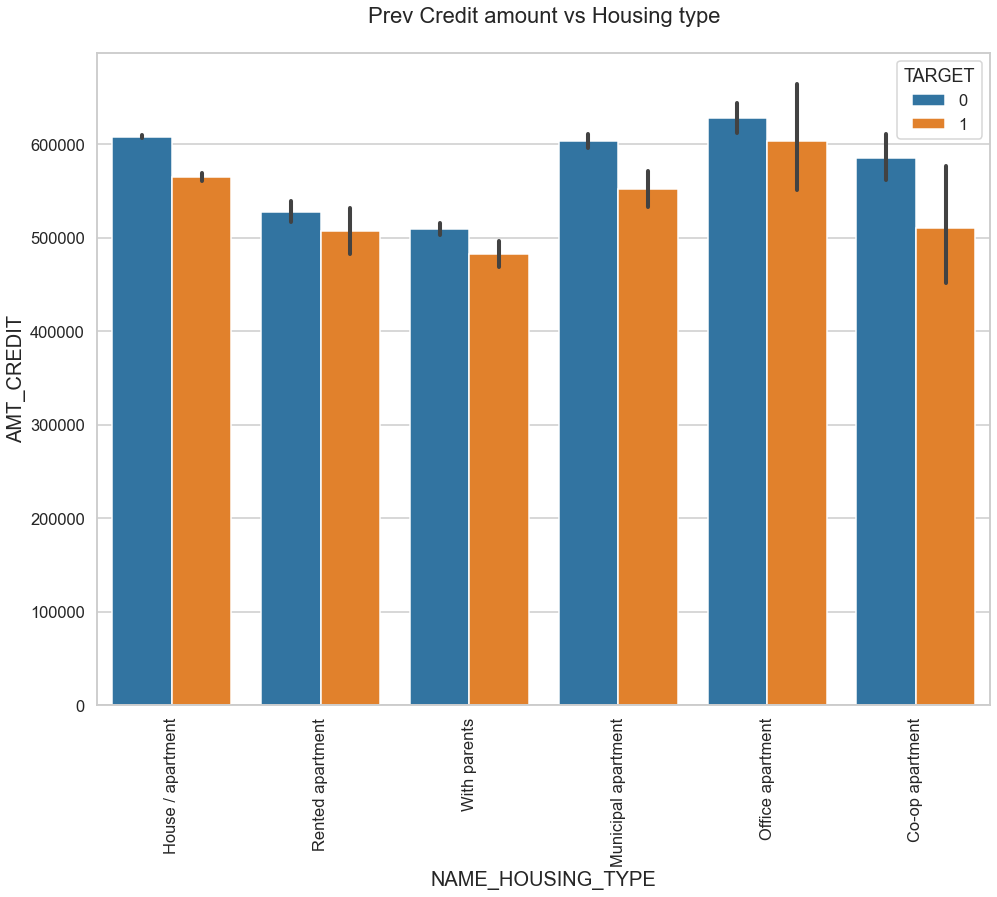

In [167]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data = combined_data, y='AMT_CREDIT',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

In [ ]:
## Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher 
## credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as 
## they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or 
## muncipal appartment for successful payments.

#CONCLUSION

#1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

#2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

#3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

#4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.